<h1 align="center">MSIN0097: Predictive Analytics</h1>
<h1 align="center">Individual Coursework</h1>
<h2 align="center">Churn Analysis on Bank Credit Customer</h1>
<br><br>
<h3 align="center">Word Count: 2000 (Excluding Not In Use)</h3>
 <h3 align="center">March 2021</h3>

<h3>Table of Contents</h3>

* [Introduction](#Introduction)
* [Get the data](#Get-the-data)
* [Take a Quick Look at the Data Structure](#Take-a-Quick-Look-at-the-Data-Structure)
* [Prepare the data for Machine Learning algorithms](#Prepare-the-data-for-Machine-Learning-algorithms)
    * [1. Split Dataset](#1.-Split-Dataset)
    * [2. Data Cleaning](#2.-Data-Cleaning)
       * [2.1 Deal with Missing Values](#2.1-Deal-with-Missing-Values)
       * [2.2 Handling Numerical Attributes](#2.2-Handling-Numerical-Attributes)
       * [2.3 Handling Text and Categorical Attributes](#2.3-Handling-Text-and-Categorical-Attributes)
* [Churn Prediction and Model Evaluation on the Test Set](#Churn-Prediction-and-Model-Evaluation-on-the-Test-Set)
    * [1. Try LogsticRegression Model](#1.-Try-LogsticRegression-Model)
    * [2. Try DecisionTreeClassifier](#2.-Try-DecisionTreeClassifier)
    * [3. Try RandomForestClassifier](#3.-Try-RandomForestClassifier)
    * [4. Try Support Vector Machines](#4.-Try-Support-Vector-Machines)
* [Clustering Analysis](#Clustering-Analysis)
    * [Principal Component Analysis](#Principal-Component-Analysis)  
* [Conclusion and Evaluation](#Conclusion-and-Evaluation)

# Introduction

***Bank credit card client churn***

In real life scenario, a credit card customer might get silently churning by multiple triggers like unexpected charges, unsatisfactory customer service, tedious dispute resolution process etc. Due to these problems, disengagement could be gradual; therefore, attrition might be hard to manage.

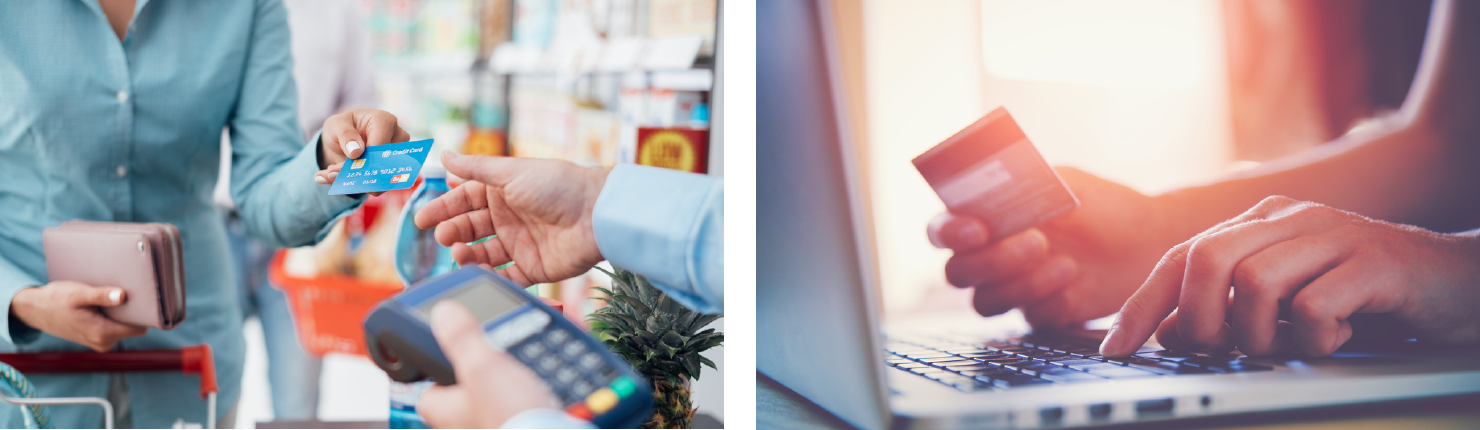

In [1]:
from IPython.display import Image
Image(filename = "background.png", width=1000, height=400)

**Questions to be answered:**

By exploring the dataset including more than 20 features of bank credit card clients, the purpose of this notebook to:

* **Classification:** Classify the group of customers who are at risk of churning? 

* **Predictor exploration:** Among all the social features given in the dataset, what are the significant predictors of client churning?

* **Clustering Analysis:** Present a cluster profile for churned customers and existing customers.
***

# Get the Data

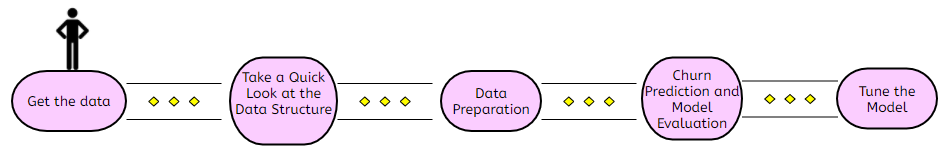

In [2]:
Image(filename = "get the data.png", width=900, height=300)

In [3]:
# Display full output rather than just the last line of output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# install for Printing plotly
!pip install -U notebook-as-pdf
!pyppeteer-install
# Import all packages that will be used in the following analysis
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import plotly.express as px
#! pip install xhtml2pdf
#from IPython.display import display, HTML
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import LabelBinarizer
except ImportError:
    from future_encoders import OneHotEncoder,OneHotEncoder, LabelEncoder, LabelBinarizer # Scikit-Learn < 0.20
    
from sklearn.pipeline import Pipeline
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
! pip install graphviz
from IPython.display import Image
#!pip install six
from six import StringIO
import pydotplus
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import cluster

!pip install -U notebook-as-pdf # for showing plotly in pdf                                             
!pyppeteer-install

[W:pyppeteer.command] chromium is already installed.


ERROR: Invalid requirement: '#'
[W:pyppeteer.command] chromium is already installed.


In [4]:
# Set up for where to save the figures
import os
PROJECT_ROOT_DIR = "images"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
# Fetch the raw dataset from github
import os
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/RuobingBai/Predictive-Analysis-Coursework/main/"
BANKCHURNERS_PATH = os.path.join("BankChurners")
BANKCHURNERS_URL = DOWNLOAD_ROOT + "BankChurners/BankChurners.csv"

def fetch_BankChurners_data(BankChurners_url=BANKCHURNERS_URL, BankChurners_path=BANKCHURNERS_PATH):
    os.makedirs(BankChurners_path, exist_ok=True)
    csv_path = os.path.join(BankChurners_path, "BankChurners.csv")
    urllib.request.urlretrieve(BankChurners_url, csv_path)
    BankChurners_csv = open(csv_path)

In [6]:
fetch_BankChurners_data()

# Take a Quick Look at the Data Structure

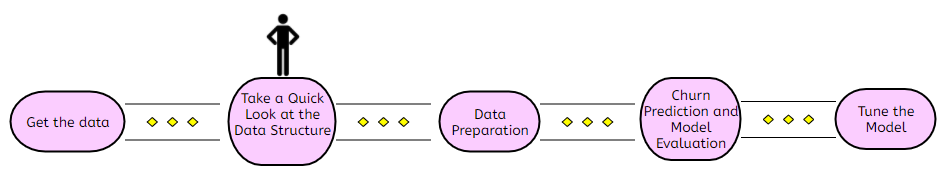

In [7]:
Image(filename = "data structure.png", width=900, height=300)

In [8]:
import pandas as pd

def load_BankChurners_data(BankChurners_path=BANKCHURNERS_PATH):
    csv_path = os.path.join(BankChurners_path, "BankChurners.csv")
    return pd.read_csv(csv_path)

In [9]:
# Have a first glance of the initial five rows of the dataset
BankChurners = load_BankChurners_data()
BankChurners.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [10]:
# To grasp missing values and overall range of the numerical values
BankChurners.info()
BankChurners.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

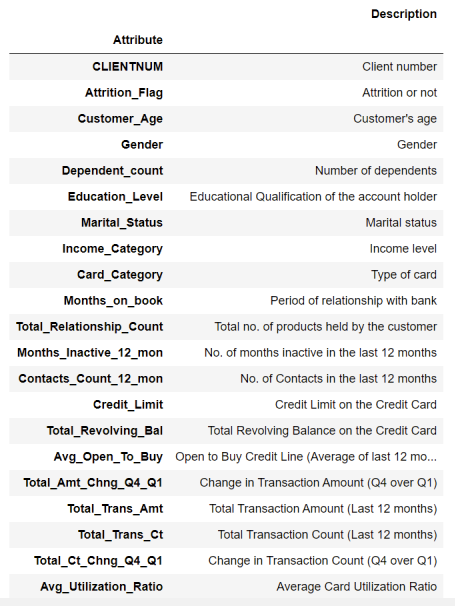

In [11]:
# Construct a feature and description table
#from pandas import Series, DataFrame
#Attribute = list(BankChurners.columns) # get the list of attributes
#Data = {"Attribute": Attribute, # construct a table showing the attribute and its corresponding description
#         "Description":["Client number","Attrition or not","Customer's age","Gender","Number of dependents",
#                        "Educational Qualification of the account holder","Marital status","Income level","Type of card",
#                       "Period of relationship with bank","Total no. of products held by the customer",
#                        "No. of months inactive in the last 12 months","No. of Contacts in the last 12 months",
#                       "Credit Limit on the Credit Card","Total Revolving Balance on the Credit Card",
#                       "Open to Buy Credit Line (Average of last 12 months)","Change in Transaction Amount (Q4 over Q1)",
#                       "Total Transaction Amount (Last 12 months)","Total Transaction Count (Last 12 months)",
#                      "Change in Transaction Count (Q4 over Q1)","Average Card Utilization Ratio"]}
#Table = pd.DataFrame(Data, columns = ["Attribute","Description"])
#Table = Table.set_index(['Attribute'])
#Table
Image(filename = "datatable.png", width=500, height=300)

<div class="alert alert-success">
<b> At this point in time, having a perception of the distribution of the number of existing customers and attrited customers is useful for us: </b>

- to decide how to split the dataset into training one and test one;
    
- to prevent bias when utilise, for instance, accuracy evaluation tool, which will lead to higher likelihood of a client being predicted to be "not churn" in case that the classification model we use has a poor performance in fact.</p> 

</div>

In [12]:
# Before I dive into data exploration, I need to create a copy of data to keep the orignal one intact
BankChurners1 = BankChurners.copy()
BankChurners1['Attrition_Flag'].value_counts()
print("The number of existing customer is almost {:.3} times the number of attributed customers."
      .format(len(BankChurners1[BankChurners1["Attrition_Flag"]=='Existing Customer'])
                        /len(BankChurners1[BankChurners1["Attrition_Flag"]=='Attrited Customer'])))

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

The number of existing customer is almost 5.22 times the number of attributed customers.


<div class="alert alert-success">
    
<b>The following section will focus on exploring the dataset attributes and addressing key questions related to:</b>
- **(A) Type of feature distribution** : how the numerical features are distributed over their scale? What are the proportion of different levels in terms of each categorical feature?
- **(B) Client's attrition status based on different categorical variables** : how the existing clients and churned clients are located in different categorical variables?
- **(C) Client's standard of earning side**: are those clients with higher salaries normally offered higher credit limit? do those clients with higher salaries leave lower revolving balance?
- **(D) Popularity of credit limit among different age groups**: how is popularity among card holders at different age? do older people prefer higher credit limit? 
- **(E) Bank & Client dual relationship**: what is the relationship between period of relationship with bank and the credit offered?

### (A) Type of feature distribution

Saving figure BankChurners_histogram_plots


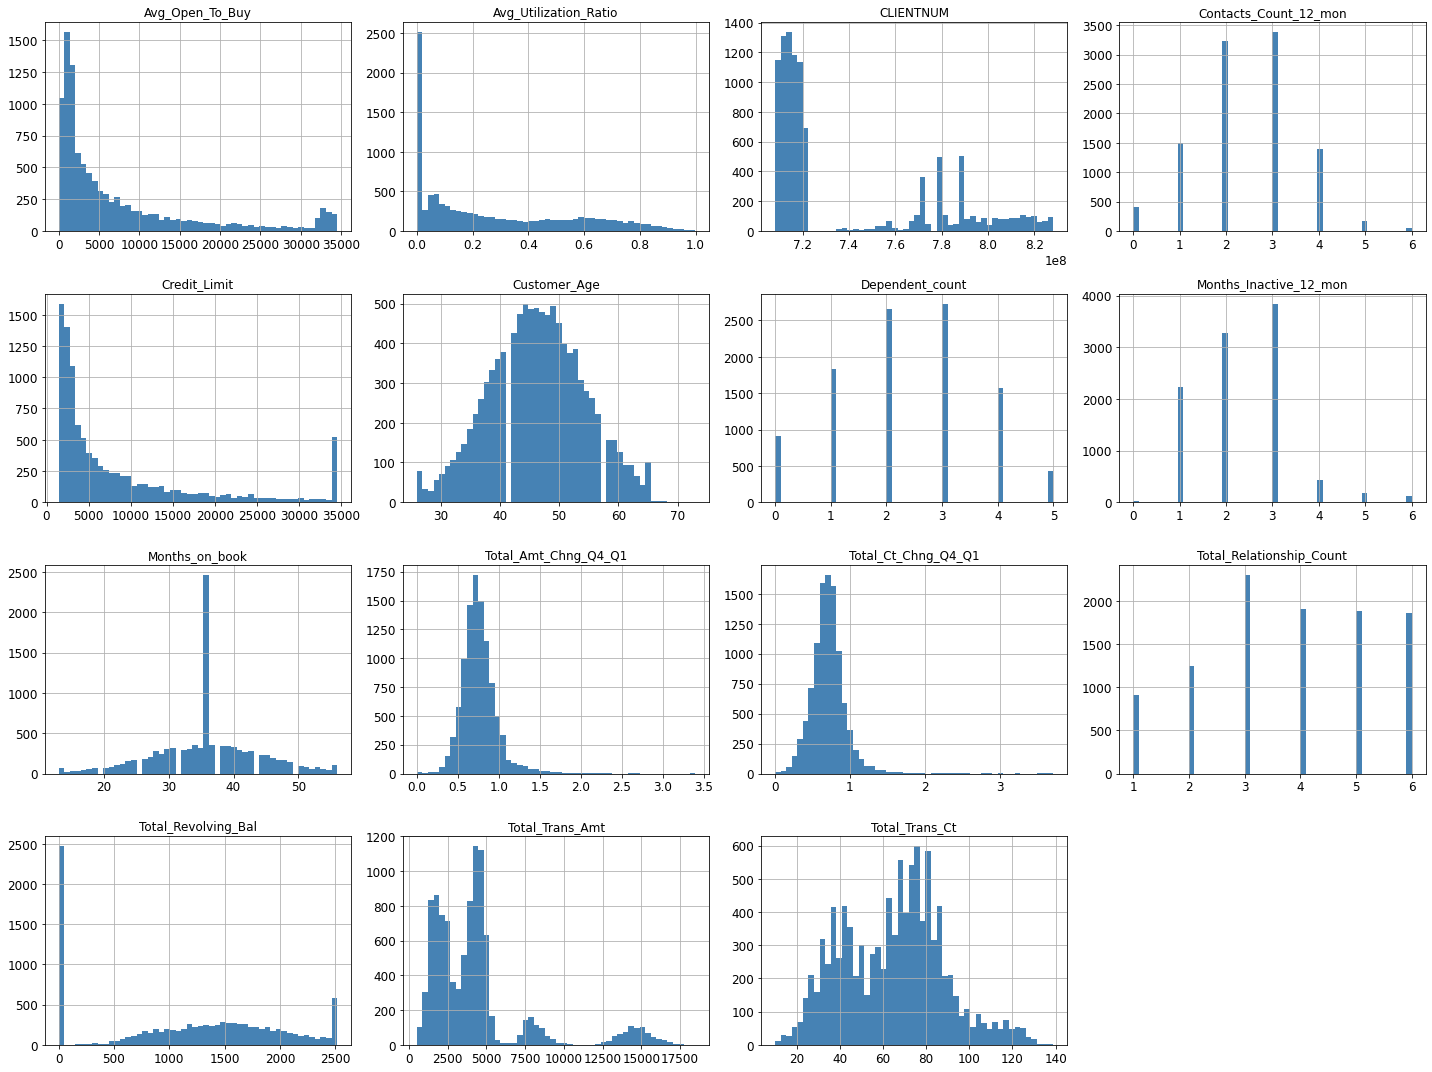

In [13]:
# Visualize the distribution of different features
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Visualize the distribution of different features
fig = BankChurners1.hist(bins=50, figsize=(20,15), color='#4682B4')
save_fig("BankChurners_histogram_plots")

In [14]:
# Next, I would like to show the proportion of different levels in terms of each categorical feature
# In this section, I want to use pie charts to show the distribution with hover
import plotly.express as px

def Piecharts(BankChurners1,cat_features = None,dropna = False):
    # Firstly set a threshold of 20 unique variables in case that too many cause too complex pie charts 
    threshold = 20
    
    # if there is no categorical features 
    if cat_features == None: 
        cat_features = BankChurners1.select_dtypes(['object','category']).columns.to_list()
        print(cat_features)
    
    # create multiple pie charts by looping through the list of categorical features 
    for cat in cat_features: 
        unique = BankChurners1[cat].nunique(dropna = dropna)
        missing = BankChurners1[cat].isna().sum()
        # show the pie chart and corresponding details 
        if unique <= threshold:
            print('This is a pie Chart for: ', cat)
            print('Number of Unique Values: ', unique)
            print('Number of Missing Values: ', missing)
            fig = px.pie(BankChurners1[cat].value_counts(dropna = dropna), values=cat, 
                 names = BankChurners1[cat].value_counts(dropna = dropna).index,title = cat,template='ggplot2',hole=0.3,width=900, height=400)
            fig.show()
        else: 
            print('Unfortunately, the pie Chart for ',cat,' is unavailable due to too many unique values.')
            print('Number of Unique Values: ', unique)
            print('Number of Missing Values: ', missing)
            print('\n')

In [15]:
Piecharts(BankChurners1) # print the pie charts

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
This is a pie Chart for:  Attrition_Flag
Number of Unique Values:  2
Number of Missing Values:  0


This is a pie Chart for:  Gender
Number of Unique Values:  2
Number of Missing Values:  0


This is a pie Chart for:  Education_Level
Number of Unique Values:  7
Number of Missing Values:  0


This is a pie Chart for:  Marital_Status
Number of Unique Values:  4
Number of Missing Values:  0


This is a pie Chart for:  Income_Category
Number of Unique Values:  6
Number of Missing Values:  0


This is a pie Chart for:  Card_Category
Number of Unique Values:  4
Number of Missing Values:  0


Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

[0 rows x 21 columns]

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
0  768805383            45                3              39   
1  818770008            49                5              44   
2  713982108            51                3              36   
3  769911858            40                4              34   
4  709106358            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

Saving figure scatter_matrix_plot


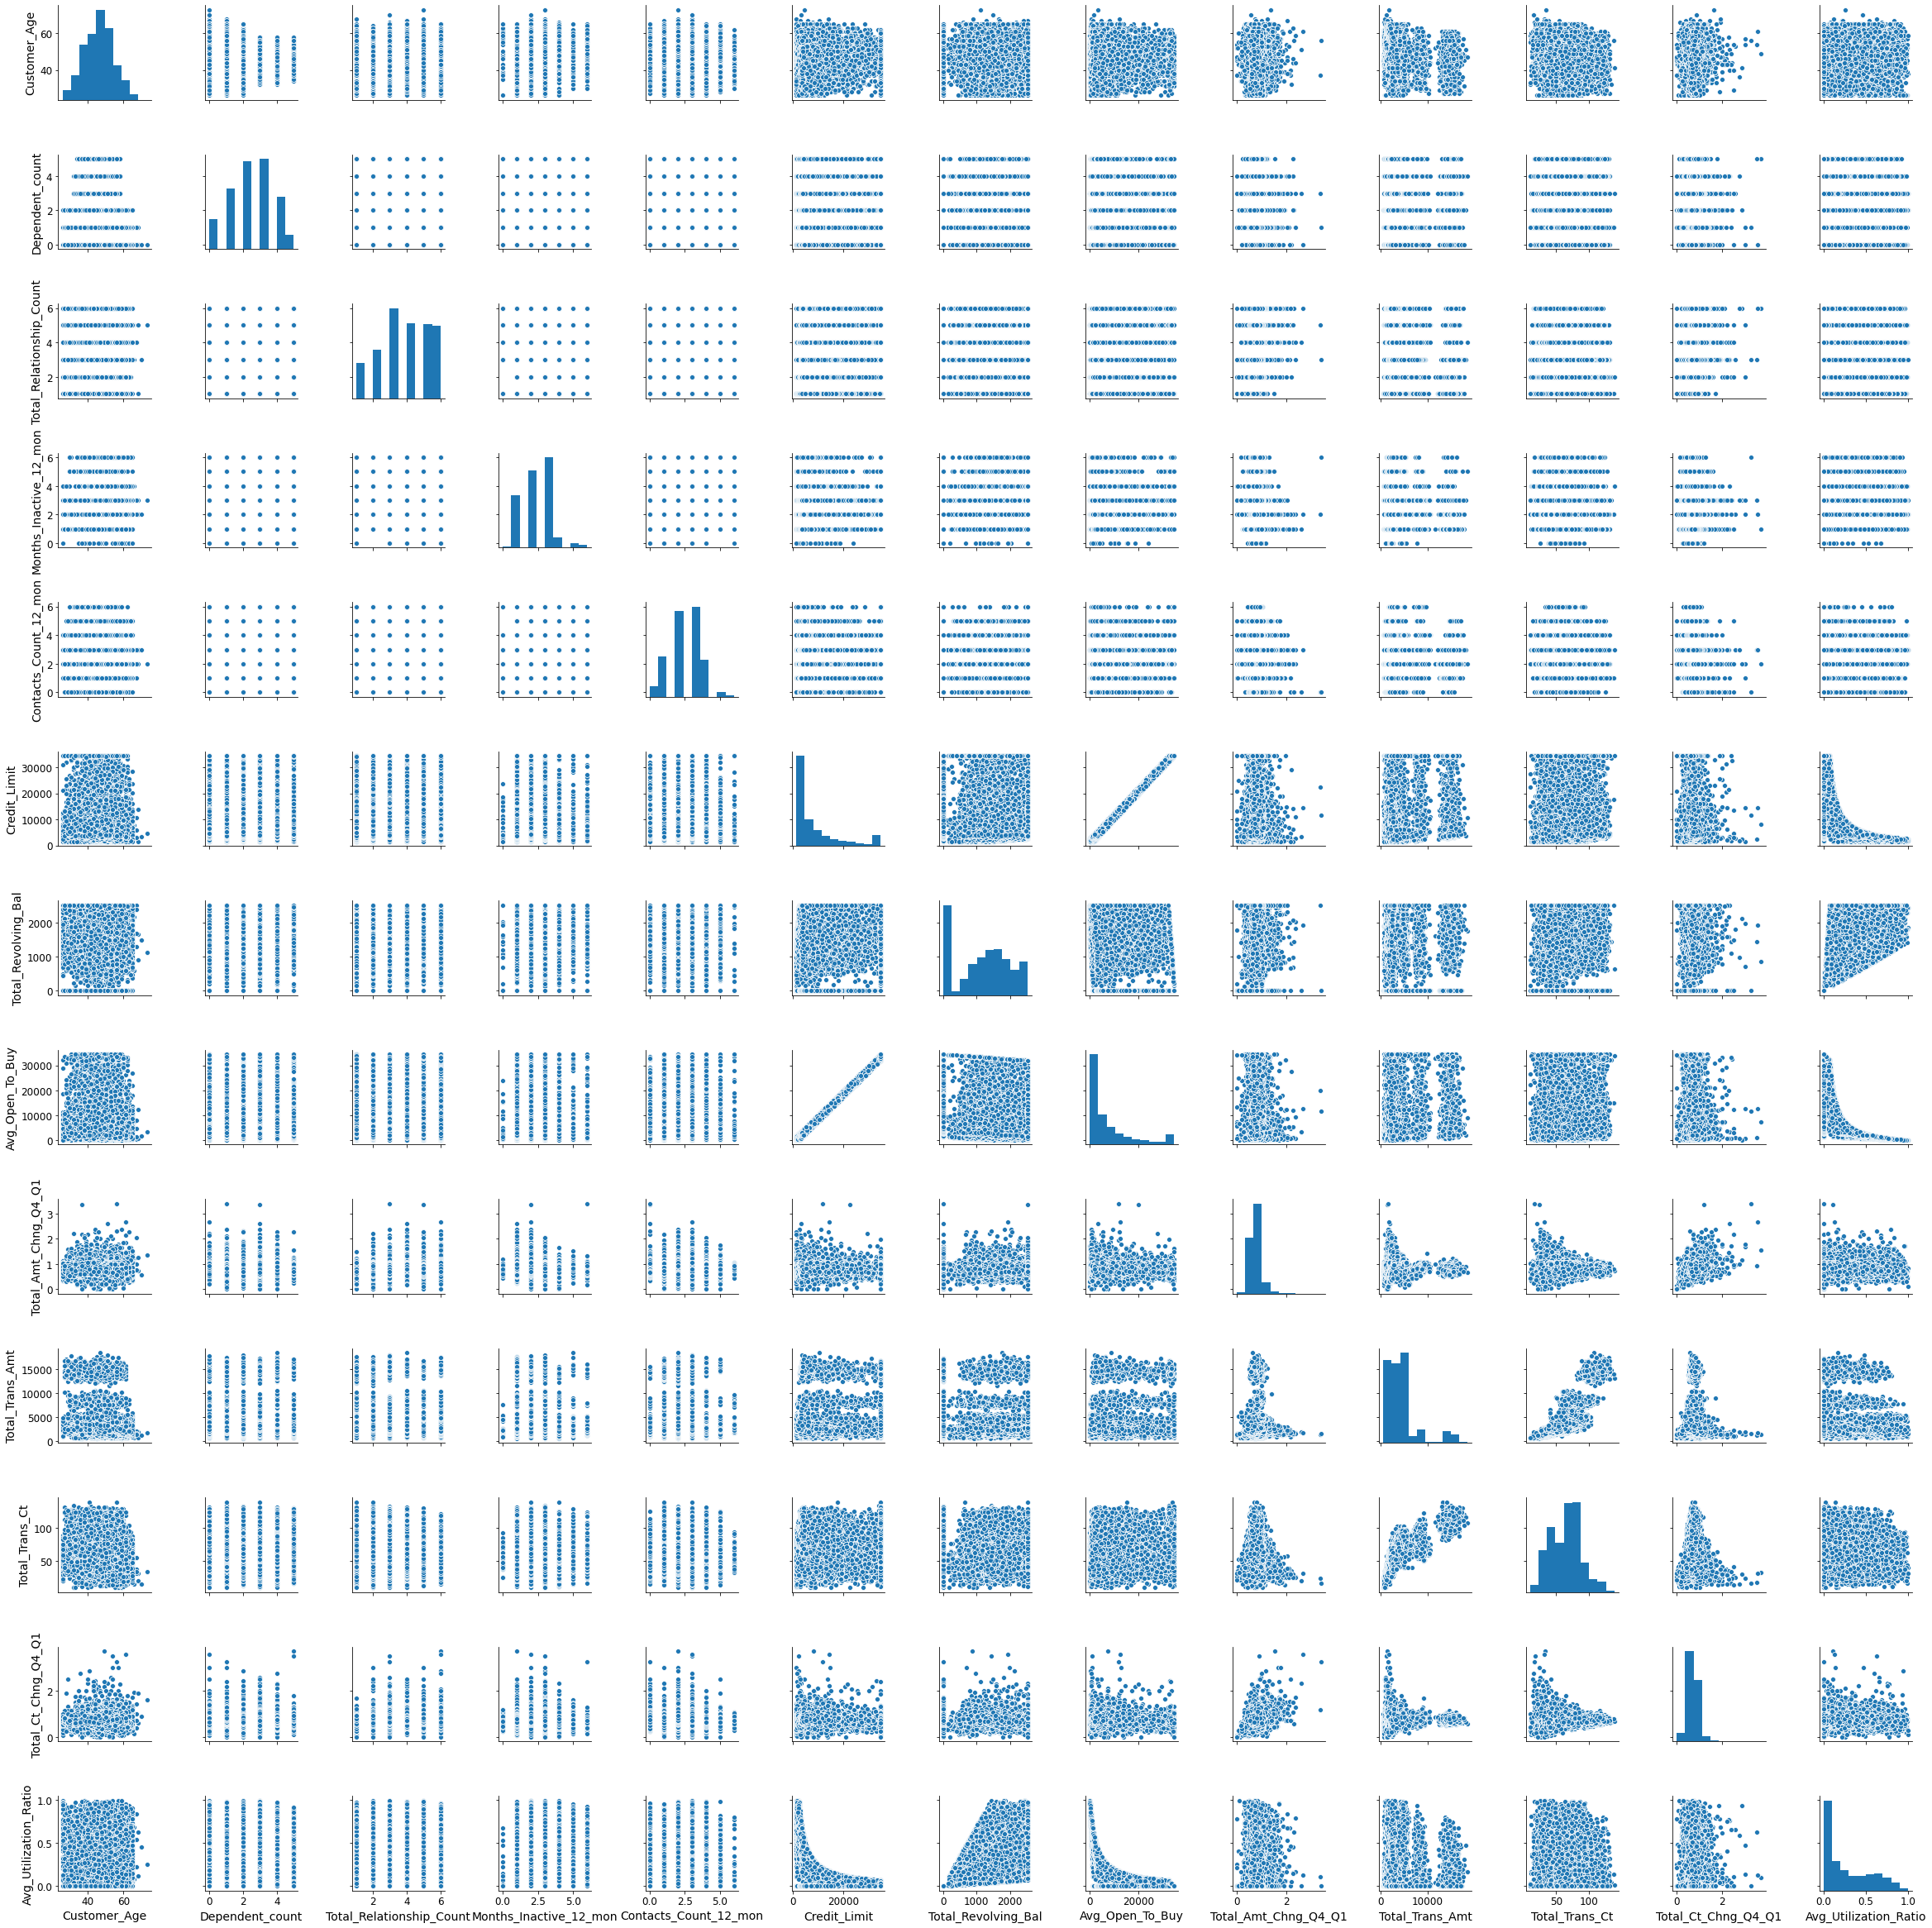

In [16]:
# Also, examining relationships between pairs of two features will be quite conducive to further analysis
# The first step of data cleaning is to find all missing values
incomplete_rows = BankChurners1[BankChurners1.isnull().any(axis=1)].head()
incomplete_rows

# Fortunately, this dataset is quite clean, perhaps there will be features noted as "unknown" in the dataset.
# The dataset discovery is to be continued...
BankChurners1._get_numeric_data().head()
from pandas.plotting import scatter_matrix
num_attributes = ["Customer_Age", "Dependent_count", "Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon",
             "Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct",
              "Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio"]
#fig = scatter_matrix(train_BC[num_attributes], figsize=(85, 100), color='#174e45') --ugly
fig = sns.pairplot(BankChurners1[num_attributes])
save_fig("scatter_matrix_plot") # save the figure into local drive

In [17]:
# Observations

# (1) There is apparent positive relationship between Avg_Open_To_Buy (difference between credit limit assigned to a cardholder 
# account and current balance on the account) and Credit_Limit (total credit offered to the card holder). 
# This is actually because of the credit equation: average open to buy + total revolving balance = credit limit offered.

# (2) The correlation between certain variables encourages me to extend my analysis on certain ratios —— 
# It could be reasonable to add features such as average amount per transaction (total transaction amount / total transaction counts) 
# and proportion of the unpaid (total revolving balance / total credit limit).

### (B) Client's attrition status based on different categorical variables

Text(0.5, 1.0, 'Distribution of Attrited and Existing Customers over Gender')

Text(0.5, 1.0, 'Distribution of Attrited and Existing Customers over Card_Category')

Text(0.5, 1.0, 'Distribution of Attrited and Existing Customers over Marital_Status')

Text(0.5, 1.0, 'Distribution of Attrited and Existing Customers over Income_Category')

Text(0.5, 1.0, 'Distribution of Attrited and Existing Customers over Education_Level')

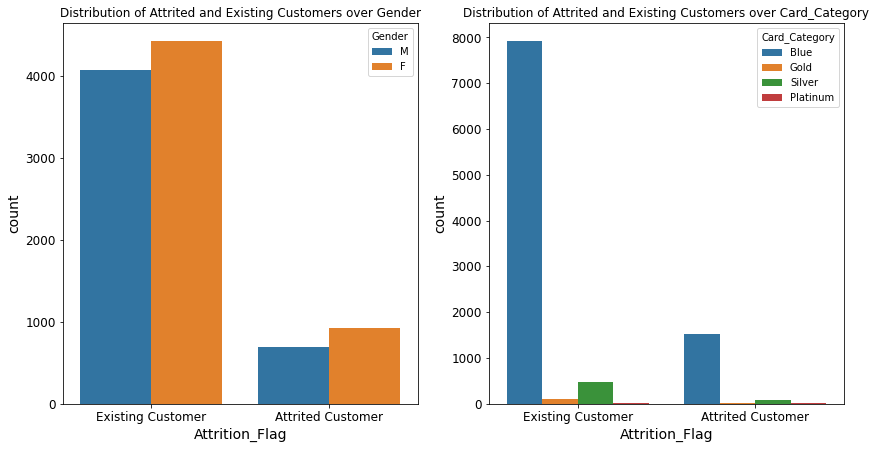

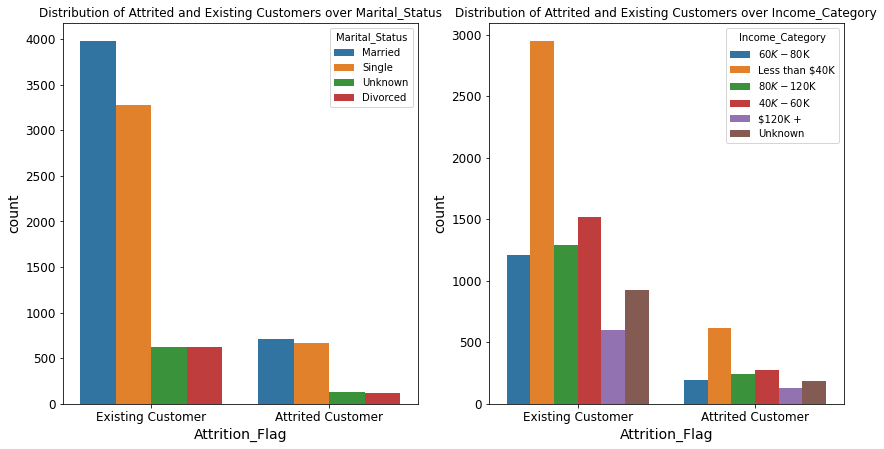

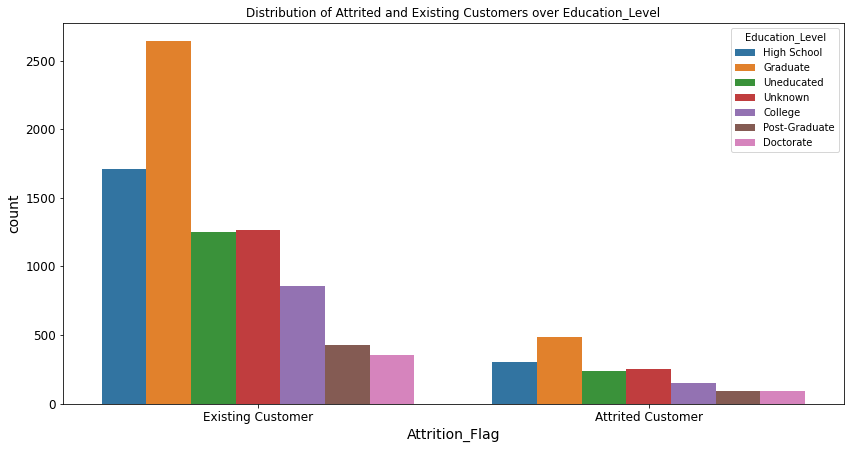

In [18]:
# Build the first countplot of 1 row and 2 columns
fig,ax = plt.subplots(1,2,figsize=(14,7),gridspec_kw={'width_ratios': [1, 1]})

ax1 = sns.countplot(x='Attrition_Flag', data=BankChurners1, hue='Gender',ax=ax[0]) # count #.of attrited and existing clients across gender
ax1.set_title("Distribution of Attrited and Existing Customers over Gender")

ax2 = sns.countplot(x='Attrition_Flag', data=BankChurners1, hue='Card_Category',ax=ax[1])# #.of attrited and existing clients across card levels
ax2.set_title("Distribution of Attrited and Existing Customers over Card_Category")

fig.show()

# Build the second countplot of 1 row and 2 columns
fig,ax = plt.subplots(1,2,figsize=(14,7),gridspec_kw={'width_ratios': [1, 1]})

ax3 = sns.countplot(x='Attrition_Flag', data=BankChurners1, hue='Marital_Status',ax=ax[0])# #.of attrited and existing clients across marital levels
ax3.set_title("Distribution of Attrited and Existing Customers over Marital_Status")

ax4 = sns.countplot(x='Attrition_Flag', data=BankChurners1, hue='Income_Category',ax=ax[1])# #.of attrited and existing clients across income levels
ax4.set_title("Distribution of Attrited and Existing Customers over Income_Category")

fig.show()

# Build the third countplot of 1 row and 1 column
fig,ax5 = plt.subplots(1,1,figsize=(14,7))

ax5 = sns.countplot(x='Attrition_Flag', data=BankChurners1, hue='Education_Level') # #.of attrited and existing clients across education levels
ax5.set_title("Distribution of Attrited and Existing Customers over Education_Level")

fig.show()

In [19]:
# Observations

# (1) The proportion of female against male is consistent in existing and churned clients, 
# so the attrition status has nothing to do with gender.

# (2) The majority of credit card clients are stay with blue card. 
# Also, the proportion of different card levels is consistent in existing and churned clients, so the attrition status has nothing to do with card level.

# (3) The majority of credit card clients earning less that 40k dollars per annuam. 
# Also, the proportion of income level and marital status is consistent in existing and churned clients, 
# so the attrition status has nothing to do with these two attributes.

# (4) In terms of education background, most of clients are graduates, but still, attrition status is irrelevant with education backgrounds.

### (C) Client's standard of earning side

Total_Revolving_Bal  Credit_Limit
Income_Category                                   
$120K +                  1222.196699  19717.322558
$80K - $120K             1206.727036  15809.890945
$60K - $80K              1154.993581  10758.772967
Unknown                  1115.064748   9516.582464
$40K - $60K              1171.994413   5462.259832
Less than $40K           1145.136759   3754.404521

Text(0, 0.5, 'Average amount')

[Text(0, 0, '$120K +'),
 Text(0, 0, '$80K - $120K'),
 Text(0, 0, '$60K - $80K'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, '$40K - $60K'),
 Text(0, 0, 'Less than $40K')]

Text(0.5, 1.0, 'Distribution of average credit limit and total revolving balance by income level')

([<matplotlib.axis.XTick at 0x1c1b9b87790>,
 [Text(0, 0, '$120K +'),
  Text(0, 0, '$80K - $120K'),
  Text(0, 0, '$60K - $80K'),
  Text(0, 0, 'Unknown'),
  Text(0, 0, '$40K - $60K'),
  Text(0, 0, 'Less than $40K')])

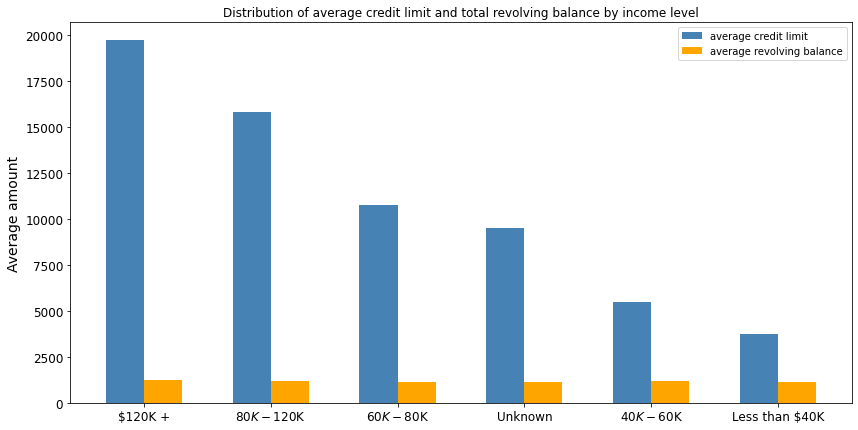

In [20]:
x=np.arange(6) # set the position of plt in x-axis

# Calculate the average credit limit and total revolving balance in each income groups, then sort them by average credit limit
avg = BankChurners1[['Income_Category',
                     'Total_Revolving_Bal','Credit_Limit']].groupby(['Income_Category']).mean().sort_values(by='Credit_Limit',ascending=False)
avg
avg_credit = avg["Credit_Limit"].tolist() # also transform them into list
avg_balance = avg["Total_Revolving_Bal"].tolist()

bar_width=0.3 # set a bar width of 0.3

tick_label= avg._stat_axis.values.tolist() # set labels in x-axis

fig, ax = plt.subplots(1,1,figsize=(14,7)) # construct a figure layout
rects1 = ax.bar(x, avg_credit, bar_width, color="#4682B4", label = "average credit limit") # create the bar of average credit limit
rects1 = ax.bar(x+bar_width, avg_balance, bar_width, color="orange", label = "average revolving balance")# create the bar of average revolving balance

# add text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Average amount")
ax.set_xticks(x) # position of x
ax.set_xticklabels(tick_label) # label of x
ax.set_title('Distribution of average credit limit and total revolving balance by income level')
plt.xticks(x+bar_width/2,tick_label) # to make the label position at the center of two bars
ax.legend() # show the legend

plt.show()


In [21]:
# Observations

# From the client's earning side, people achieving higher than $120,000 per year also own an average of $19,717 credit limit, 
# which is the highest. 
# On the contrary, those have a poor standard of earning with less than $40,000 and $40,000 to $60,000 per year 
# are only entitled to $3,754 and $5,462 credit limit. 
# Therefore, credit card providers value those "profitable" clients with stable and high cash inflows, 
# and are unwilling to offer high credits for those having weak solvency.

# Interestingly, the average unpaid amount are distributed evenly in different income groups, 
# which means higher income group have absolutely strong power to pay the debt, 
# but unfortunately those earned less than $40,000 also suffer a one third unpaid amount, at approximately $1,145.

### (D) Popularity of credit limit among different age groups

array(<bound method Series.unique of 0        (40, 45]
1        (45, 50]
2        (50, 55]
3        (35, 40]
4        (35, 40]
           ...   
10122    (45, 50]
10123    (40, 45]
10124    (40, 45]
10125    (25, 30]
10126    (40, 45]
Name: Customer_Age, Length: 10127, dtype: category
Categories (10, interval[int64]): [(25, 30] < (30, 35] < (35, 40] < (40, 45] ... (55, 60] < (60, 65] < (65, 70] < (70, 75]]>,
      dtype=object)

Credit_Limit
Customer_Age              
(25, 30]       6278.691321
(30, 35]       7602.400459
(35, 40]       8318.055413
(40, 45]       9212.483701
(45, 50]       9263.994849
(50, 55]       9032.857184
(55, 60]       7674.073758
(60, 65]       6489.215696
(65, 70]       5788.922222
(70, 75]       4469.000000

[Interval(25, 30, closed='right'),
 Interval(30, 35, closed='right'),
 Interval(35, 40, closed='right'),
 Interval(40, 45, closed='right'),
 Interval(45, 50, closed='right'),
 Interval(50, 55, closed='right'),
 Interval(55, 60, closed='right'),
 Interval(60, 65, closed='right'),
 Interval(65, 70, closed='right'),
 Interval(70, 75, closed='right')]

Text(0, 0.5, 'Average amount')

[Text(0, 0, '(25, 30]'),
 Text(0, 0, '(30, 35]'),
 Text(0, 0, '(35, 40]'),
 Text(0, 0, '(40, 45]'),
 Text(0, 0, '(45, 50]'),
 Text(0, 0, '(50, 55]'),
 Text(0, 0, '(55, 60]'),
 Text(0, 0, '(60, 65]'),
 Text(0, 0, '(65, 70]'),
 Text(0, 0, '(70, 75]')]

Text(0.5, 1.0, 'Distribution of average credit limit by client age groups')

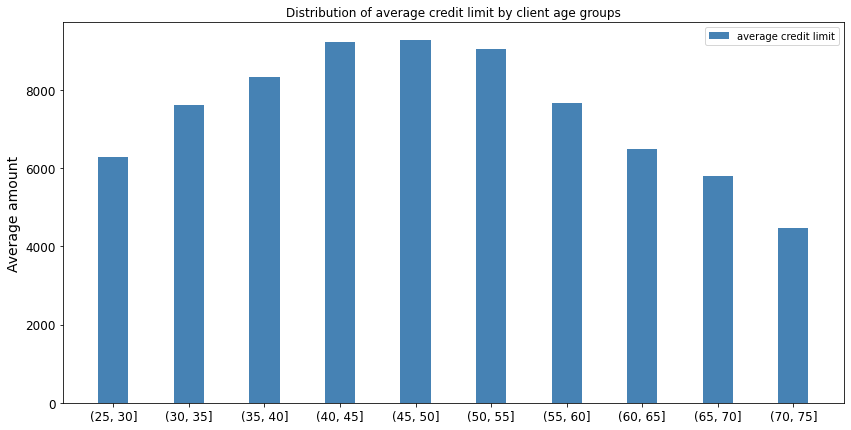

In [22]:
# Discrete customer ages into buckets
age = BankChurners1["Customer_Age"]
age_labels_series = pd.cut(age, [25,30,35,40,45,50,55,60,65,70,75])
age_labels = np.array(age_labels_series.unique)
age_labels

# group the data by age labels 
grouped = pd.DataFrame(BankChurners1[["Credit_Limit"]].groupby([age_labels_series]).mean())
grouped

# transform them into lists
avg_credit = grouped["Credit_Limit"].tolist()

tick_label= grouped.index.tolist() # set labels in x-axis
tick_label

bar_width=0.4 # set a bar width of 0.3
x=np.arange(10)

fig, ax = plt.subplots(1,1,figsize=(14,7)) # construct a figure layout
rects1 = ax.bar(x, avg_credit, bar_width, color="#4682B4", label = "average credit limit") 

# add text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Average amount")
ax.set_xticks(x) # position of x
ax.set_xticklabels(tick_label) # label of x
ax.set_title('Distribution of average credit limit by client age groups')
ax.legend() # show the legend

plt.show()

In [23]:
# Observations

# This is a bell-shaped distribution. 
# The middle age group of 45 to 50 years old are generally entitled to highest average credit limit, 
# since they still have a job and stable cash inflow, which is valued by the credit card provider. 
# In contrast to this, the elderly group of 65+ are entitle to a credit limit of only $4,469 to $5,788, 
# around 55% of the credit offered to the group of 45 to 50 years old people. 
# Maybe these people benefit from their annuity and bank perceive them as clients with high credit rating.

### (E) Bank & Client dual relationship

Text(0.5, 1.0, 'Relationship between the month on book and credit limit')

Text(0.5, 0, 'Months_on_book')

Text(0, 0.5, 'Credit_Limit')

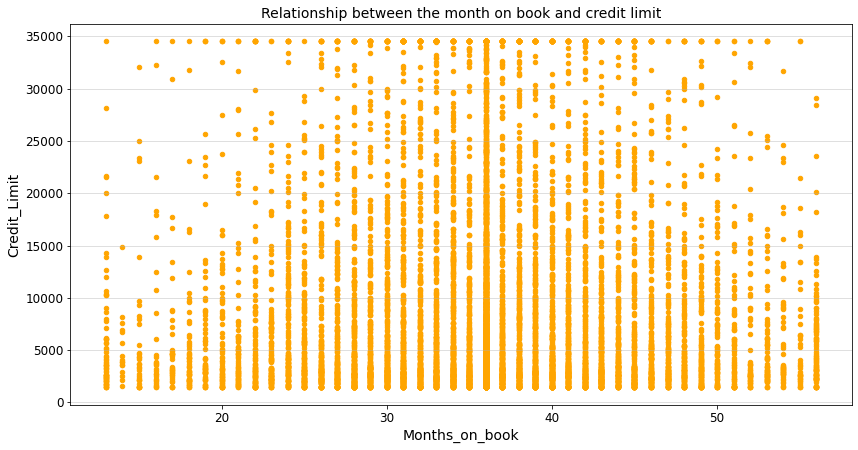

In [24]:
# Scatter plot for review the correlation of customer and bank relationship with credit limit offered
# Month on book is the period of relationship
BankChurners1.plot.scatter(x="Months_on_book", y="Credit_Limit", figsize=(14,7), color='orange')
plt.title('Relationship between the month on book and credit limit', fontsize=14)
plt.xlabel('Months_on_book', fontsize=14)
plt.ylabel('Credit_Limit', fontsize=14)
plt.grid(axis='y', alpha=0.50)

In [25]:
# Observations

# For clients having a period of relationship with bank over 50 months and shorter than 20 months,
# they are more likely to be given no more than $15,000 credit limit annually. 
# However, for those maintaining a 35 to 40 month-on-book relationship, 
# they are more likely to own over $25,000 credit. 
# Hence, the feature month-on-book may suggest how actively a client is engaged with the credit card line, 
# that is, more active the clients are, the higher likelihood for them to pay the debts in time, 
# and the higher credit limit could be rewarded to them as well.

# Prepare the data for Machine Learning Algorithms

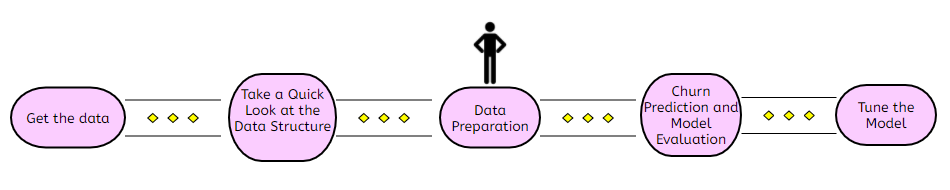

In [26]:
Image(filename = "preprocessing.png", width=900, height=300)

## 1. Split Dataset

In [27]:
# Split the whole dataset into training dataset and test dataset
train_BC, test_BC = train_test_split(BankChurners, test_size=0.2, random_state=42) # 20% samples will be in test dataset

## 2. Data Cleaning

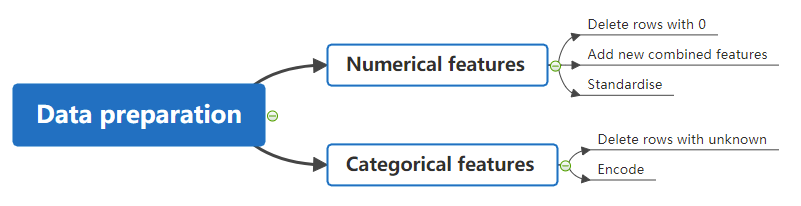

In [28]:
Image(filename = "mindmap.png", width=800, height=100)

### 2.1 Deal with Missing Values

In [29]:
# The first step of data cleaning is to find all missing values
incomplete_rows = train_BC[train_BC.isnull().any(axis=1)].head()
incomplete_rows
# Fortunately, this dataset is quite clean, perhaps there will be features noted as "unknown" in the dataset.
# The dataset discovery is to be continued...

Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

[0 rows x 21 columns]

### 2.2 Handling Numerical Attributes

### 2.2.1 Feature Engineering, Selection and Scaling

In [30]:
# Feature Engineering
# As analysed in the last section, the following features could be inserted into dataset:

#(1) Average transaction amount (total transaction amount / total transaction counts)

#(2) Proportion of the unpaid (total revolving balance / open-to-buy amount)

#(3) Proportion of inactive status (months inactive in the last 12 months / months on book ) (hyperparameter)

# Based on the mathematical formula, I need to drop those denominators with "0".

# check the values at zero
train_BC[train_BC['Customer_Age']==0].shape
train_BC[train_BC['Months_on_book']==0].shape

train_BC[train_BC['Total_Trans_Amt']==0].shape
train_BC[train_BC['Total_Trans_Ct']==0].shape

train_BC[train_BC['Total_Revolving_Bal']==0].shape
train_BC[train_BC['Avg_Open_To_Buy']==0].shape

train_BC[train_BC['Months_Inactive_12_mon']==0].shape
train_BC[train_BC['Months_on_book']==0].shape

# Conclusion:
print("There will be: {} out of 10127 values of 0 influencing the feature engineering for Total_Revolving_Bal."
      .format(len(train_BC[train_BC['Total_Revolving_Bal']==0])))
print("There will be: {} out of 10127 values of 0 influencing the feature engineering for Months_Inactive_12_mon."
      .format(len(train_BC[train_BC['Months_Inactive_12_mon']==0])))

# I will delete them as these records as outliers
train_BC = train_BC[train_BC['Total_Revolving_Bal']!=0]
train_BC = train_BC[train_BC['Months_Inactive_12_mon']!=0]

train_BC.shape

(0, 21)

(0, 21)

(0, 21)

(0, 21)

(1986, 21)

(0, 21)

(22, 21)

(0, 21)

There will be: 1986 out of 10127 values of 0 influencing the feature engineering for Total_Revolving_Bal.
There will be: 22 out of 10127 values of 0 influencing the feature engineering for Months_Inactive_12_mon.


(6104, 21)

In [31]:
# retrieve the values of the following features for calculation preparation
trans_amount_ix, trans_count_ix, rev_bal_ix, open_to_buy_ix, month_inactive_ix, month_on_book_ix = [
    list(train_BC.columns).index(col)
    for col in ("Total_Trans_Amt", "Total_Trans_Ct", "Total_Revolving_Bal", "Avg_Open_To_Buy", "Months_Inactive_12_mon", "Months_on_book")]

def add_extra_features(X, add_proportion_inactive=True): # define a function to include the added new features
    Avg_tran_amount = X[:, trans_amount_ix] / X[:, trans_count_ix]
    Prop_unpaid = X[:, rev_bal_ix] / X[:, open_to_buy_ix]
    if add_proportion_inactive:
        Proportion_inactive = X[:, month_inactive_ix] / X[:, month_on_book_ix]
        return np.c_[X, Avg_tran_amount, Prop_unpaid,
                     Proportion_inactive]
    else:
        return np.c_[X, Avg_tran_amount, Prop_unpaid]

# new combined features will be "Avg_tran_amount", "Prop_unpaid"
attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_proportion_inactive": False})

train_BC_extra_attribs = attr_adder.fit_transform(train_BC.values)

In [32]:
# take a look at the new dataset with new features adding in
train_BC_extra_attribs = pd.DataFrame(
    train_BC_extra_attribs,
    columns=list(train_BC.columns)+["Avg_tran_amount", "Prop_unpaid"],
    index=train_BC.index)
train_BC_extra_attribs.head()
train_BC_extra_attribs.shape

CLIENTNUM     Attrition_Flag Customer_Age Gender Dependent_count  \
9066  713071383  Existing Customer           54      F               1   
5814  714246333  Attrited Customer           58      F               4   
792   718206783  Existing Customer           45      F               4   
1791  721096983  Existing Customer           34      F               2   
5011  720028683  Existing Customer           49      F               2   

     Education_Level Marital_Status Income_Category Card_Category  \
9066         Unknown         Single         Unknown          Blue   
5814     High School        Married         Unknown          Blue   
792          Unknown         Single  Less than $40K          Gold   
1791        Graduate         Single  Less than $40K          Blue   
5011     High School        Married     $40K - $60K          Blue   

     Months_on_book  ... Credit_Limit Total_Revolving_Bal Avg_Open_To_Buy  \
9066             36  ...         3723                1728            1995   
5814             48  ...         5396                1803            3593   
792              36  ...        15987                1648           14339   
1791             36  ...         3625                2517            1108   
5011             39  ...         2720                1926             794   

     Total_Amt_Chng_Q4_Q1 Total_Trans_Amt Total_Trans_Ct Total_Ct_Chng_Q4_Q1  \
9066                0.595            8554             99               0.678   
5814                0.493            2107             39               0.393   
792                 0.732            1436             36                1.25   
1791                1.158            2616             46                 1.3   
5011                0.602            3806             61               0.794   

     Avg_Utilization_Ratio Avg_tran_amount Prop_unpaid  
9066                 0.464          86.404    0.866165  
5814                 0.334         54.0256    0.501809  
792                  0.103         39.8889    0.114931  
1791                 0.694         56.8696     2.27166  
5011                 0.708         62.3934     2.42569  

[5 rows x 23 columns]

(6104, 23)

In [33]:
# select the part of numerical attributes
num_attributes = train_BC_extra_attribs[["Dependent_count", "Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon",
             "Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct",
              "Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio", "Avg_tran_amount", "Prop_unpaid"]]
type(num_attributes)

num_features = ["Dependent_count", "Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon",
             "Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct",
              "Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio", "Avg_tran_amount", "Prop_unpaid"]
num_features

pandas.core.frame.DataFrame

['Dependent_count',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Avg_tran_amount',
 'Prop_unpaid']

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin # use dataframee selectors to obtain the important features

# Create a class to select numerical columns 
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]
    
from sklearn.preprocessing import StandardScaler
# Recall from the numerical feature distribution,
# they tend to have very different scales and units. 
# Therefore. I am supposed to standardized them then start to compare these features and place them into our models.
scaler = StandardScaler()
scaler.fit_transform(num_attributes)

array([[-1.03093586, -1.82689068,  0.67259491, ...,  0.3915345 ,
         0.87162812, -0.05316117],
       [ 1.28914494, -1.82689068,  1.66908019, ..., -0.10768131,
        -0.33323299, -0.08529156],
       [ 1.28914494,  1.39343412, -1.32037564, ..., -0.99474941,
        -0.85928811, -0.11940798],
       ...,
       [-1.03093586, -0.53876076, -0.32389037, ...,  0.94451201,
        -0.56422422,  0.0070471 ],
       [ 1.28914494, -0.53876076, -1.32037564, ...,  1.17875943,
         0.00876559,  0.0483195 ],
       [ 0.51578467,  0.1053042 , -1.32037564, ...,  0.44913632,
        -1.03058089, -0.04843853]])

In [35]:
# Overall build a pipeline to transform
num_pipeline = Pipeline([
        #('scaler', StandardScaler(num_attributes)), # this step has been performed
        ('selector', DataFrameSelector(num_features)),
    ])

train_BC_prepared = num_pipeline.fit_transform(num_attributes)
train_BC_prepared.head(5)
train_BC_prepared.shape

print("The training dataset has {} samples.".format(len(train_BC_prepared)))

Dependent_count Total_Relationship_Count Months_Inactive_12_mon  \
9066               1                        1                      3   
5814               4                        1                      4   
792                4                        6                      1   
1791               2                        4                      3   
5011               2                        5                      3   

     Contacts_Count_12_mon Credit_Limit Total_Revolving_Bal Avg_Open_To_Buy  \
9066                     3         3723                1728            1995   
5814                     3         5396                1803            3593   
792                      3        15987                1648           14339   
1791                     4         3625                2517            1108   
5011                     4         2720                1926             794   

     Total_Amt_Chng_Q4_Q1 Total_Trans_Amt Total_Trans_Ct Total_Ct_Chng_Q4_Q1  \
9066                0.595            8554             99               0.678   
5814                0.493            2107             39               0.393   
792                 0.732            1436             36                1.25   
1791                1.158            2616             46                 1.3   
5011                0.602            3806             61               0.794   

     Avg_Utilization_Ratio Avg_tran_amount Prop_unpaid  
9066                 0.464          86.404    0.866165  
5814                 0.334         54.0256    0.501809  
792                  0.103         39.8889    0.114931  
1791                 0.694         56.8696     2.27166  
5011                 0.708         62.3934     2.42569

(6104, 14)

The training dataset has 6104 samples.


### 2.3 Handling Text and Categorical Attributes

In [36]:
# Check all categorical data
train_BC["Gender"].value_counts()
train_BC["Education_Level"].value_counts()
train_BC["Marital_Status"].value_counts()
train_BC["Income_Category"].value_counts()
train_BC["Card_Category"].value_counts()

F    3176
M    2928
Name: Gender, dtype: int64

Graduate         1907
High School      1228
Unknown           906
Uneducated        895
College           596
Post-Graduate     305
Doctorate         267
Name: Education_Level, dtype: int64

Married     2895
Single      2316
Divorced     465
Unknown      428
Name: Marital_Status, dtype: int64

Less than $40K    2097
$40K - $60K       1106
$80K - $120K       947
$60K - $80K        852
Unknown            650
$120K +            452
Name: Income_Category, dtype: int64

Blue        5674
Silver       337
Gold          80
Platinum      13
Name: Card_Category, dtype: int64

### 2.3.1 Look into Categorical Features with "Unknown"

Share of customers with unknown education level data:  14.84%
Share of customers with unknown marital status data:  7.01%
Share of customers with unknown income category data:  10.65%
Share of customers with unknown card category data:  0.00%


Text(0.5, 1.0, 'Distribution of education level by churn status')

Text(0.5, 1.0, 'Distribution of marital status by churn status')

Text(0.5, 1.0, 'Distribution of income category by churn status')

Text(0.5, 1.0, 'Distribution of Card category by churn status')

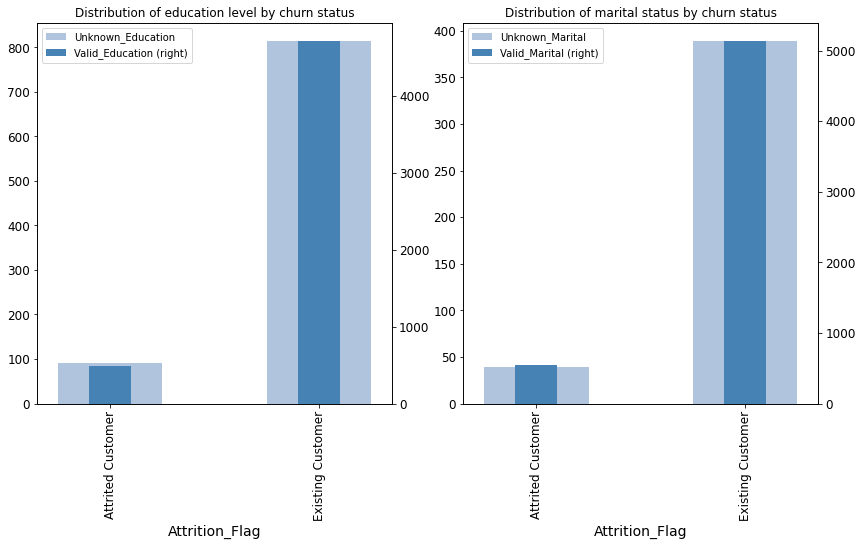

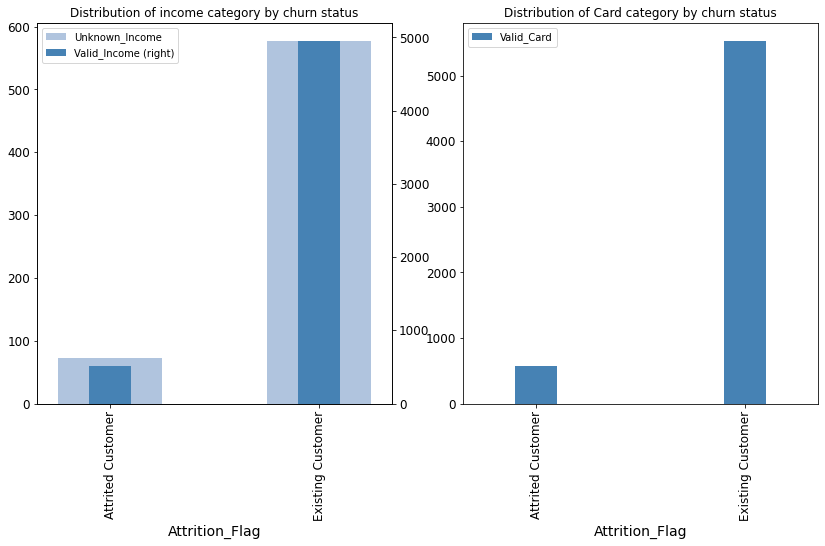

In [37]:
# Unsurprisingly, there are quite a few unknown values distributed in the whole dataset, how can I deal with them?
# Observe "Education_Level", "Marital_Status","Income_Category","Card_Category" with unknown values against attrition status
print("Share of customers with unknown education level data: ","{:.2%}".format(len(train_BC[train_BC["Education_Level"]=='Unknown'])
                                                                               /len(train_BC)))

print("Share of customers with unknown marital status data: ","{:.2%}".format(len(train_BC[train_BC["Marital_Status"]=='Unknown'])
                                                                               /len(train_BC)))

print("Share of customers with unknown income category data: ","{:.2%}".format(len(train_BC[train_BC["Income_Category"]=='Unknown'])
                                                                               /len(train_BC)))

print("Share of customers with unknown card category data: ","{:.2%}".format(len(train_BC[train_BC["Card_Category"]=='Unknown'])
                                                                               /len(train_BC)))

# Check the distribution of these features with unknown values by attrition status
# ax1 and ax2 are prepared for distribution of unknown educational level by attrition status  
fig,(ax1, ax3) = plt.subplots(1, 2,figsize=(14,7),gridspec_kw={'width_ratios': [1, 1]})

ax1 = train_BC[train_BC["Education_Level"]
               =='Unknown'][['Attrition_Flag',
                             'Education_Level']].rename(columns
                        ={'Education_Level':'Unknown_Education'}).groupby('Attrition_Flag').count().plot(kind=
                                                                                                         'bar',ax=ax1,color=
                                                                                                         '#B0C4DE',label='Unknown_Education')
ax2 = train_BC[train_BC["Education_Level"]
               !='Unknown'][['Attrition_Flag',
                             'Education_Level']].rename(columns
                        ={'Education_Level':'Valid_Education'}).groupby('Attrition_Flag').count().plot(kind=
                                                                                                       'bar',ax=ax1,color=
                                                                                                       '#4682B4',secondary_y=
                                                                                                       True,width=0.2,label='Valid_Education')
ax1.set_title('Distribution of education level by churn status')

# ax3 and ax4 are prepared for distribution of unknown marital status by attrition status
ax3 = train_BC[train_BC["Marital_Status"]
               =='Unknown'][['Attrition_Flag',
                             'Marital_Status']].rename(columns
                       ={'Marital_Status':'Unknown_Marital'}).groupby('Attrition_Flag').count().plot(kind=
                                                                                                     'bar',ax=ax3,color=
                                                                                                     '#B0C4DE',label='Unknown_Marital')
    
ax4 = train_BC[train_BC["Marital_Status"]
               !='Unknown'][['Attrition_Flag','Marital_Status']].rename(columns
                ={'Marital_Status':'Valid_Marital'}).groupby('Attrition_Flag').count().plot(kind=
                                                                                            'bar',ax=ax3,color=
                                                                                            '#4682B4',secondary_y=True,width=
                                                                                            0.2,label='Valid_Marital')
ax3.set_title('Distribution of marital status by churn status')

# ax5 and ax6 are prepared for distribution of unknown income category by attrition status
fig,(ax5, ax8) = plt.subplots(1, 2, figsize=(14,7),gridspec_kw={'width_ratios': [1, 1]})

ax5 = train_BC[train_BC["Income_Category"]
               =='Unknown'][['Attrition_Flag','Income_Category']].rename(columns
                ={'Income_Category':'Unknown_Income'}).groupby('Attrition_Flag').count().plot(kind=
                                                                                              'bar',ax=ax5,color=
                                                                                              '#B0C4DE',label='Unknown_Income')
    
ax6 = train_BC[train_BC["Income_Category"]
               !='Unknown'][['Attrition_Flag','Income_Category']].rename(columns
                ={'Income_Category':'Valid_Income'}).groupby('Attrition_Flag').count().plot(kind=
                                                                                            'bar',ax=ax5,color=
                                                                                            '#4682B4',secondary_y=True,width=0.2,label=
                                                                                            'Valid_Income')
ax5.set_title('Distribution of income category by churn status')

# ax7 and ax8 are prepared for distribution of unknown card category by attrition status
#ax7 = train_BC[train_BC["Card_Category"]
 #              ='Unknown'][['Attrition_Flag','Card_Category']].rename(columns
  #                                                                       ={'Card_Category':'Unknown_Card'}).groupby('Attrition_Flag').count().plot(kind='bar',ax=ax7,color='#a7bfc6',label='Unknown_Card')
    
ax8 = train_BC[train_BC["Card_Category"]
               !='Unknown'][['Attrition_Flag','Card_Category']].rename(columns
                ={'Card_Category':'Valid_Card'}).groupby('Attrition_Flag').count().plot(kind='bar',ax=ax8,width=0.2,color=
                                                                                        '#4682B4',label='Valid_Card')
ax8.set_title('Distribution of Card category by churn status')


In [38]:
# Since the customers with unknown information are proportionally distributed against attrition status, it would be safe to drop them
train_BC.shape
train_BC = train_BC[train_BC["Education_Level"] != "Unknown"]
train_BC = train_BC[train_BC["Marital_Status"] != "Unknown"]
train_BC = train_BC[train_BC["Income_Category"] != "Unknown"]
train_BC.shape
print("The training dataset has {} samples.".format(len(train_BC)))

(6104, 21)

(4301, 21)

The training dataset has 4301 samples.


### 2.3.2 Encode Categorical Features

In [39]:
import pandas as pd
import numpy as np
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import LabelBinarizer
except ImportError:
    from future_encoders import OneHotEncoder,OneHotEncoder, LabelEncoder, LabelBinarizer # Scikit-Learn < 0.20
    
from sklearn.pipeline import Pipeline
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20
    
ord_encoder = OrdinalEncoder()
label_encoder = LabelEncoder()
one_encoder = OneHotEncoder()

# use ordinal encoder to encode ['Education_Level','Income_Category','Card_Category']
train_BC[['Education_Level','Income_Category','Card_Category']] = ord_encoder.fit_transform(train_BC[['Education_Level','Income_Category', 'Card_Category']])

# use ordinal encoder to encode ['Marital_Status','Gender','Attrition_Flag']
train_BC[['Marital_Status']] = label_encoder.fit_transform(train_BC[['Marital_Status']])
train_BC[['Gender']] = label_encoder.fit_transform(train_BC[['Gender']])
train_BC[['Attrition_Flag']] = label_encoder.fit_transform(train_BC[['Attrition_Flag']])

print("Education has:{} unique levels.".format(list(train_BC['Education_Level'].unique()))) 
print("Income has:{} unique levels.".format(list(train_BC['Income_Category'].unique()))) 
print("Card category has:{} unique levels.".format(list(train_BC['Card_Category'].unique()))) 
print("Marital status has:{} unique categories.".format(list(train_BC['Marital_Status'].unique()))) 
print("Card category has:{} unique categories.".format(list(train_BC['Gender'].unique()))) 

train_BC.head(5)
train_BC.shape

Education has:[2.0, 3.0, 1.0, 4.0, 0.0, 5.0] unique levels.
Income has:[4.0, 1.0, 0.0, 2.0, 3.0] unique levels.
Card category has:[0.0, 1.0, 3.0, 2.0] unique levels.
Marital status has:[2, 1, 0] unique categories.
Card category has:[0, 1] unique categories.


CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
1791  721096983               1            34       0                2   
5011  720028683               1            49       0                2   
2260  778942233               1            60       0                0   
1817  719952408               1            30       1                0   
3773  827408058               1            44       0                3   

      Education_Level  Marital_Status  Income_Category  Card_Category  \
1791              2.0               2              4.0            0.0   
5011              3.0               1              1.0            0.0   
2260              1.0               1              4.0            0.0   
1817              2.0               1              4.0            0.0   
3773              2.0               1              4.0            0.0   

      Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
1791              36  ...                       3                      4   
5011              39  ...                       3                      4   
2260              45  ...                       2                      4   
1817              36  ...                       3                      2   
3773              40  ...                       2                      2   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
1791        3625.0                 2517           1108.0   
5011        2720.0                 1926            794.0   
2260        1438.3                  648            790.3   
1817        2550.0                 1623            927.0   
3773        2232.0                 2002            230.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
1791                 1.158             2616              46   
5011                 0.602             3806              61   
2260                 0.477             1267              27   
1817                 0.650             1870              51   
3773                 1.107             3803              68   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
1791                1.300                  0.694  
5011                0.794                  0.708  
2260                1.077                  0.451  
1817                0.275                  0.636  
3773                0.511                  0.897  

[5 rows x 21 columns]

(4301, 21)

In [40]:
# Merge the two well-prepared datasets on client_number
train_BC = pd.merge(train_BC,train_BC_prepared, how="left")
train_BC.shape

# To change the sequence of the 23 columns to be more understandable
train_BC = train_BC[['CLIENTNUM','Attrition_Flag','Customer_Age','Gender','Dependent_count'
                    ,'Education_Level','Marital_Status','Income_Category','Card_Category'
                    ,'Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon'
                    ,'Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt'
                    ,'Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Avg_tran_amount','Prop_unpaid']]
train_BC.head(5)

(4301, 23)

CLIENTNUM  Attrition_Flag  Customer_Age  Gender Dependent_count  \
0  721096983               1            34       0               2   
1  720028683               1            49       0               2   
2  778942233               1            60       0               0   
3  719952408               1            30       1               0   
4  827408058               1            44       0               3   

   Education_Level  Marital_Status  Income_Category  Card_Category  \
0              2.0               2              4.0            0.0   
1              3.0               1              1.0            0.0   
2              1.0               1              4.0            0.0   
3              2.0               1              4.0            0.0   
4              2.0               1              4.0            0.0   

   Months_on_book  ... Credit_Limit Total_Revolving_Bal Avg_Open_To_Buy  \
0              36  ...         3625                2517            1108   
1              39  ...         2720                1926             794   
2              45  ...       1438.3                 648           790.3   
3              36  ...         2550                1623             927   
4              40  ...         2232                2002             230   

  Total_Amt_Chng_Q4_Q1 Total_Trans_Amt Total_Trans_Ct Total_Ct_Chng_Q4_Q1  \
0                1.158            2616             46                 1.3   
1                0.602            3806             61               0.794   
2                0.477            1267             27               1.077   
3                 0.65            1870             51               0.275   
4                1.107            3803             68               0.511   

  Avg_Utilization_Ratio Avg_tran_amount Prop_unpaid  
0                 0.694         56.8696     2.27166  
1                 0.708         62.3934     2.42569  
2                 0.451         46.9259    0.819942  
3                 0.636         36.6667     1.75081  
4                 0.897         55.9265     8.70435  

[5 rows x 23 columns]

### Do the same data preparation on the test dataset

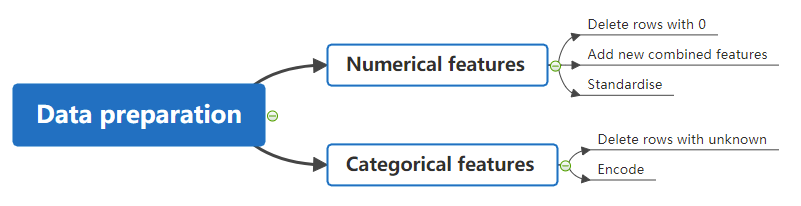

In [41]:
Image(filename = "mindmap.png", width=800, height=100)

In [42]:
# Do the same data preparation on the test dataset
# Step(1) Delete rows with 0, which will disturb the future feature engineering
test_BC[test_BC['Customer_Age']==0].shape
test_BC[test_BC['Months_on_book']==0].shape

test_BC[test_BC['Total_Trans_Amt']==0].shape
test_BC[test_BC['Total_Trans_Ct']==0].shape

test_BC[test_BC['Total_Revolving_Bal']==0].shape
test_BC[test_BC['Avg_Open_To_Buy']==0].shape

test_BC[test_BC['Months_Inactive_12_mon']==0].shape
test_BC[test_BC['Months_on_book']==0].shape

test_BC = test_BC[test_BC['Total_Revolving_Bal']!=0]
test_BC = test_BC[test_BC['Months_Inactive_12_mon']!=0]

(0, 21)

(0, 21)

(0, 21)

(0, 21)

(484, 21)

(0, 21)

(7, 21)

(0, 21)

In [43]:
# (2) Add new combined features by attr_adder.fit_transform
test_BC_extra_attribs = attr_adder.fit_transform(test_BC.values)

test_BC_extra_attribs = pd.DataFrame(
    test_BC_extra_attribs,
    columns=list(test_BC.columns)+["Avg_tran_amount", "Prop_unpaid"],
    index=test_BC.index)

In [44]:
# (3) Standardise the numerical features by scaler.fit_transform
num_attributes1 = test_BC_extra_attribs[["Dependent_count", "Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon",
             "Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct",
              "Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio", "Avg_tran_amount", "Prop_unpaid"]]

scaler.fit_transform(num_attributes1)

# (4) Select features by num_pipeline.fit_transform, which includes only DataFrameSelector
test_BC_prepared = num_pipeline.fit_transform(num_attributes1)
test_BC_prepared.head(5)
test_BC_prepared.shape

array([[ 0.46165949,  0.10309535,  0.69835351, ...,  0.50432875,
        -0.17896107, -0.08922548],
       [-1.03788072,  0.73733796,  2.68369121, ...,  1.30380472,
        -0.4535001 ,  0.23524461],
       [-0.28811062,  0.10309535,  0.69835351, ...,  0.7494511 ,
         0.26296843, -0.02344398],
       ...,
       [-1.03788072, -1.79963246, -0.29431534, ..., -0.56289624,
         0.22849877, -0.24772989],
       [-1.78765083,  1.37158056, -0.29431534, ..., -0.81178971,
        -0.18537123, -0.26919327],
       [-1.78765083, -1.79963246, -1.28698419, ..., -1.20021435,
         1.26492485, -0.29710702]])

Dependent_count Total_Relationship_Count Months_Inactive_12_mon  \
3781               3                        4                      3   
2922               1                        5                      5   
5070               2                        4                      3   
7246               3                        4                      2   
623                3                        3                      3   

     Contacts_Count_12_mon Credit_Limit Total_Revolving_Bal Avg_Open_To_Buy  \
3781                     4         2991                1508            1483   
2922                     4         2192                1569             623   
5070                     3         1734                 987             747   
7246                     3         4786                1516            3270   
623                      2         3714                2170            1544   

     Total_Amt_Chng_Q4_Q1 Total_Trans_Amt Total_Trans_Ct Total_Ct_Chng_Q4_Q1  \
3781                0.703            3734             64               0.882   
2922                0.706            4010             79               0.717   
5070                0.879            4727             67               0.914   
7246                 0.94            4973             74                0.85   
623                 0.524            1454             35               0.522   

     Avg_Utilization_Ratio Avg_tran_amount Prop_unpaid  
3781                 0.504         58.3438     1.01686  
2922                 0.716         50.7595     2.51846  
5070                 0.569         70.5522     1.32129  
7246                 0.317         67.2027    0.463609  
623                  0.584         41.5429     1.40544

(1538, 14)

In [45]:
# (5) Delete samples with unknown categorial features
test_BC = test_BC[test_BC["Education_Level"] != "Unknown"]
test_BC = test_BC[test_BC["Marital_Status"] != "Unknown"]
test_BC = test_BC[test_BC["Income_Category"] != "Unknown"]

test_BC_edu = test_BC[['Education_Level']]
test_BC_inc = test_BC[['Income_Category']]
test_BC_car = test_BC[['Card_Category']]
test_BC_mar = test_BC[['Marital_Status']]
test_BC_gen = test_BC[['Gender']]

# (6) Transform categorical features with different encoders
test_BC[['Education_Level','Income_Category','Card_Category']] = ord_encoder.fit_transform(test_BC[['Education_Level','Income_Category', 'Card_Category']])
test_BC[['Marital_Status']] = label_encoder.fit_transform(test_BC[['Marital_Status']])
test_BC[['Gender']] = label_encoder.fit_transform(test_BC[['Gender']])
test_BC[['Attrition_Flag']] = label_encoder.fit_transform(test_BC[['Attrition_Flag']])

# Merge the two well-prepared datasets on client_number
test_BC = pd.merge(test_BC,test_BC_prepared, how="left")
test_BC.shape

# To change the sequence of the 23 columns to be more understandable
test_BC = test_BC[['CLIENTNUM','Attrition_Flag','Customer_Age','Gender','Dependent_count'
                    ,'Education_Level','Marital_Status','Income_Category','Card_Category'
                    ,'Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon'
                    ,'Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt'
                    ,'Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Avg_tran_amount','Prop_unpaid']]
test_BC.head(5)

# Check the ultimate shape
train_BC.shape
test_BC.shape

(1065, 23)

CLIENTNUM  Attrition_Flag  Customer_Age  Gender Dependent_count  \
0  719455083               1            48       0               3   
1  773503308               1            59       1               1   
2  715452408               1            37       0               2   
3  711264033               1            47       1               3   
4  717189183               1            35       1               1   

   Education_Level  Marital_Status  Income_Category  Card_Category  \
0              5.0               2              4.0            0.0   
1              5.0               2              4.0            0.0   
2              2.0               0              4.0            0.0   
3              1.0               0              1.0            0.0   
4              1.0               2              1.0            0.0   

   Months_on_book  ... Credit_Limit Total_Revolving_Bal Avg_Open_To_Buy  \
0              39  ...         2991                1508            1483   
1              53  ...         2192                1569             623   
2              36  ...         1734                 987             747   
3              36  ...         4786                1516            3270   
4              24  ...        10467                1961            8506   

  Total_Amt_Chng_Q4_Q1 Total_Trans_Amt Total_Trans_Ct Total_Ct_Chng_Q4_Q1  \
0                0.703            3734             64               0.882   
1                0.706            4010             79               0.717   
2                0.879            4727             67               0.914   
3                 0.94            4973             74                0.85   
4                0.713            2665             65               0.667   

  Avg_Utilization_Ratio Avg_tran_amount Prop_unpaid  
0                 0.504         58.3438     1.01686  
1                 0.716         50.7595     2.51846  
2                 0.569         70.5522     1.32129  
3                 0.317         67.2027    0.463609  
4                 0.187              41    0.230543  

[5 rows x 23 columns]

(4301, 23)

(1065, 23)

# Churn Prediction and Model Evaluation on the Test Set

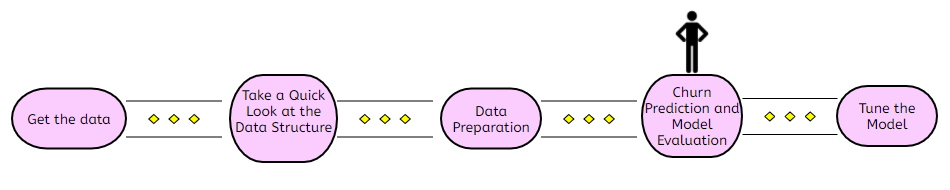

In [46]:
Image(filename = "churn prediction.png", width=900, height=300)

In [47]:
train_BC1 = train_BC.drop("Attrition_Flag", axis=1) # drop labels for training set
train_BC1_label = train_BC["Attrition_Flag"].copy()

test_BC1 = test_BC.drop("Attrition_Flag", axis=1) # drop labels for test set
test_BC1_label = test_BC["Attrition_Flag"].copy()

train_BC1.head()
test_BC1.head()

train_BC1_label = train_BC1_label.to_frame()
train_BC1_label.head()
test_BC1_label = test_BC1_label.to_frame()
test_BC1_label.head()

# Check the ultimate shape
train_BC1.shape
test_BC1.shape

CLIENTNUM  Customer_Age  Gender Dependent_count  Education_Level  \
0  721096983            34       0               2              2.0   
1  720028683            49       0               2              3.0   
2  778942233            60       0               0              1.0   
3  719952408            30       1               0              2.0   
4  827408058            44       0               3              2.0   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0               2              4.0            0.0              36   
1               1              1.0            0.0              39   
2               1              4.0            0.0              45   
3               1              4.0            0.0              36   
4               1              4.0            0.0              40   

  Total_Relationship_Count  ... Credit_Limit Total_Revolving_Bal  \
0                        4  ...         3625                2517   
1                        5  ...         2720                1926   
2                        5  ...       1438.3                 648   
3                        3  ...         2550                1623   
4                        6  ...         2232                2002   

  Avg_Open_To_Buy Total_Amt_Chng_Q4_Q1 Total_Trans_Amt Total_Trans_Ct  \
0            1108                1.158            2616             46   
1             794                0.602            3806             61   
2           790.3                0.477            1267             27   
3             927                 0.65            1870             51   
4             230                1.107            3803             68   

  Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio Avg_tran_amount Prop_unpaid  
0                 1.3                 0.694         56.8696     2.27166  
1               0.794                 0.708         62.3934     2.42569  
2               1.077                 0.451         46.9259    0.819942  
3               0.275                 0.636         36.6667     1.75081  
4               0.511                 0.897         55.9265     8.70435  

[5 rows x 22 columns]

CLIENTNUM  Customer_Age  Gender Dependent_count  Education_Level  \
0  719455083            48       0               3              5.0   
1  773503308            59       1               1              5.0   
2  715452408            37       0               2              2.0   
3  711264033            47       1               3              1.0   
4  717189183            35       1               1              1.0   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0               2              4.0            0.0              39   
1               2              4.0            0.0              53   
2               0              4.0            0.0              36   
3               0              1.0            0.0              36   
4               2              1.0            0.0              24   

  Total_Relationship_Count  ... Credit_Limit Total_Revolving_Bal  \
0                        4  ...         2991                1508   
1                        5  ...         2192                1569   
2                        4  ...         1734                 987   
3                        4  ...         4786                1516   
4                        6  ...        10467                1961   

  Avg_Open_To_Buy Total_Amt_Chng_Q4_Q1 Total_Trans_Amt Total_Trans_Ct  \
0            1483                0.703            3734             64   
1             623                0.706            4010             79   
2             747                0.879            4727             67   
3            3270                 0.94            4973             74   
4            8506                0.713            2665             65   

  Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio Avg_tran_amount Prop_unpaid  
0               0.882                 0.504         58.3438     1.01686  
1               0.717                 0.716         50.7595     2.51846  
2               0.914                 0.569         70.5522     1.32129  
3                0.85                 0.317         67.2027    0.463609  
4               0.667                 0.187              41    0.230543  

[5 rows x 22 columns]

Attrition_Flag
0               1
1               1
2               1
3               1
4               1

Attrition_Flag
0               1
1               1
2               1
3               1
4               1

(4301, 22)

(1065, 22)

<div class="alert alert-success">
    
<b>Short-list Promising Models:</b>
- LogsticRegression Model
    
- DecisionTreeClassifier
    
- RandomForestClassifier
    
- Support Vector Machines
    
<b>Short-list Promising Tuning Methods:</b>
- Gradient Boosting
    
- GridSearchCV
    
- RandomizedSearchCV

- Dimensionality

<b>Short-list Promising Models for Clustering:</b>
- KMeans
    
- PCA

### 1. Try LogsticRegression Model

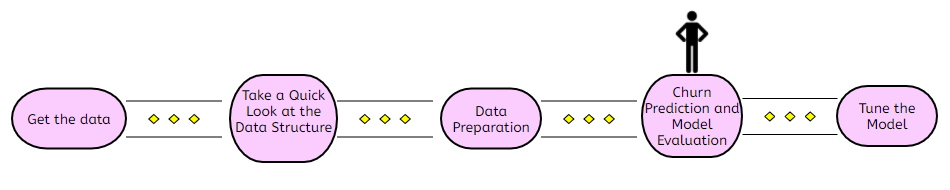

In [48]:
Image(filename = "churn prediction.png", width=900, height=300)

In [49]:
# Import logistic regression model
# from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1.0, solver='lbfgs') # use the default C at 1.0 indicates a default degree of regularization strength
clf.fit(train_BC1, train_BC1_label) # 'lbfgs’ solvers support only L2 regularization

# Show a precision and recall metrics
# from sklearn import metrics
test_BC1_label_pred = clf.predict(test_BC1)
print(metrics.classification_report(test_BC1_label, test_BC1_label_pred))
print("Prediction accuracy:", "{:.2%}".format(metrics.accuracy_score(test_BC1_label, test_BC1_label_pred)))

LogisticRegression()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       105
           1       0.90      1.00      0.95       960

    accuracy                           0.90      1065
   macro avg       0.45      0.50      0.47      1065
weighted avg       0.81      0.90      0.85      1065

Prediction accuracy: 90.14%


Text(0.5, 1.0, 'Confusion matrix, without normalization')

Text(0.5, 1.0, 'Normalized confusion matrix')

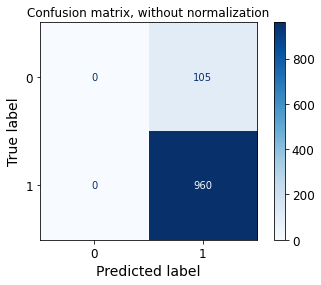

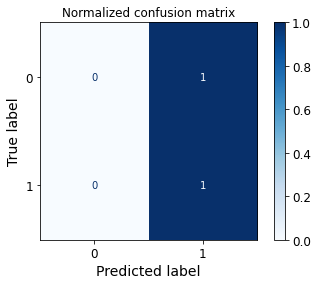

Recall: 100.00%


In [50]:
# Show a confusion metrics
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.metrics import precision_recall_fscore_support
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score, precision_score
titles = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles:
    disp = plot_confusion_matrix(clf, test_BC1, test_BC1_label,
                                 display_labels=clf.classes_,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

print("Recall:","{:.2%}".format((recall_score(test_BC1_label,test_BC1_label_pred))))

<div class="alert alert-danger">
<b>Warning !</b>
    
<p> At the first glance, the prediction accuracy is quite good with 0.901 hit rate; however, the model actually gives me zero precision in predicting "Attrition Flag" at 0,which is the group of churning clients. It's rather frustrating and fatal! This result can also be observed from the following colour metrics with 100% recall rate. 
    
Therefore, simply using logistic regression model in this way leads to wrong predictions in predicting attrited clients.</p> 

</div>

<div class="alert alert-success">
<b> Reflection on LogisticRegression Model </b>

<p> As analysed in the last section, the following features could be inserted into dataset:

**(1) Denominator at "0":**
    
This error happened in this section is that precision is ill-defined and being set to 0.0 in labels with no predicted samples. I can almost attribute this error to the "0" denominator in calculating precision. Hence, perhaps changing a classifier will work for this dataset.

    
**(2) Linear Decision Boundary:**
    
Within logistic regression algorithm, I can always separate observations that exactly belong to a category from all the other observations that do not belong to that category; therefore, I am likely to obtain a linear decision boundary instead of a non-linear one, which is not that suitable for this case.</p> 

</div>

### 2. Try DecisionTreeClassifier

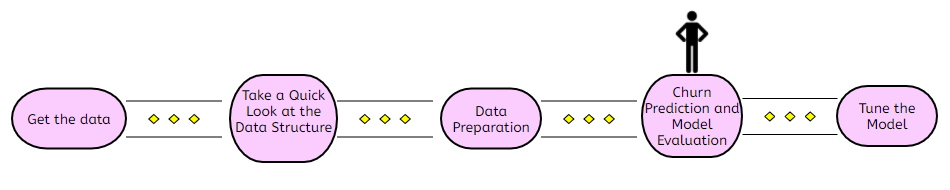

In [51]:
Image(filename = "churn prediction.png", width=900, height=300)

In [52]:
# from sklearn.tree import DecisionTreeClassifier

# Fit the DecisionTreeClassifier to training dataset
clf = DecisionTreeClassifier(max_leaf_nodes=8) # put a number of leaf nodes randomly
clf.fit(train_BC1, train_BC1_label)

# Predict the labels of the test set
print("Prediction accuracy:", "{:.2%}".format(clf.score(test_BC1, test_BC1_label)))

DecisionTreeClassifier(max_leaf_nodes=8)

Prediction accuracy: 92.77%


In [53]:
# Visualise the decision tree
#from sklearn.tree import export_graphviz
#! pip install graphviz
#from IPython.display import Image
#!pip install six
#from six import StringIO
#import pydotplus

dot_data = StringIO()

export_graphviz(
    clf,
    feature_names=['CLIENTNUM','Customer_Age','Gender','Dependent_count'
                    ,'Education_Level','Marital_Status','Income_Category','Card_Category'
                    ,'Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon'
                    ,'Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt'
                    ,'Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Avg_tran_amount','Prop_unpaid'],
    class_names=['0','1'],
    out_file=dot_data,
    rounded=True,
    filled=True,special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [54]:
# to evoke the setup
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

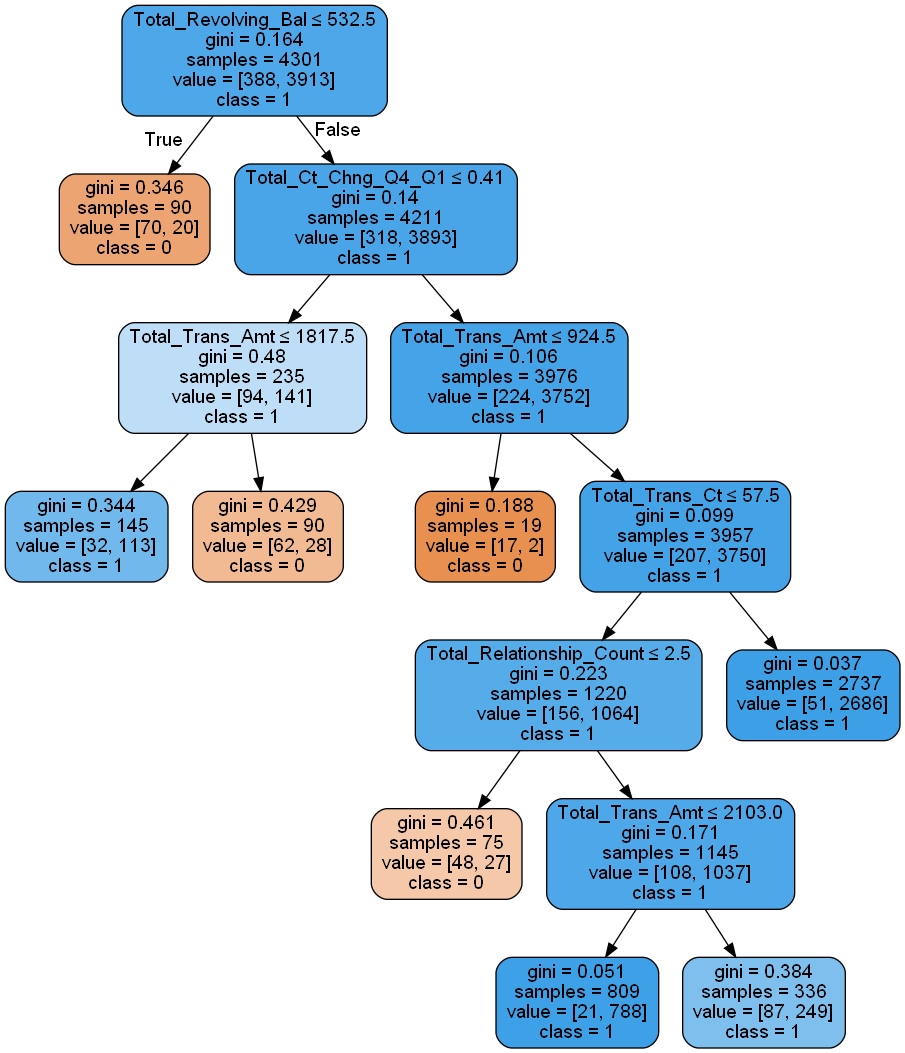

In [55]:
Image(graph.create_png())

In [56]:
# Check the shape
train_BC1.shape
test_BC1.shape

(4301, 22)

(1065, 22)

<div class="alert alert-success">
<b> Reflection on DecisionTreeClassifier: (to be continued) </b>

<p>

**(1) Classification Boundary:**
    
Based on this classification tree, I can start at the root node, asking whether the client's total revolving balance is lower than 532.5. If it is, then I move down to that root's right child node, asking a second time whether change in this client's total transaction count is smaller than 0.41...
    
Assume the client's total revolving balance is higher than 532.5, I can directly classify thia customer into "Attrited customer".
    
In comparison with the previous logistic regression model, I can perceive a non-linear decision boundary created within the decision tree classification model, which creates rectangles to classify attributes, better-performed!


**(2) Accuracy Evaluation through Score():**
    
However, there is one thing needs to be highlighted —— the dataset contains imbalanced classes, in which case the number of existing customers are 8500 and the number of churners are only 1627, approximately one quarter of the existing customer component. Under this circumstance, accuracy is not a useful metric because it is much more likely for the predictor to predict the customer not being churned. (So it could perform very well in identifying customers who does not churn; however, it could completely fail at identifying customers who will actually churn.)

**(3) Confusion matrix:**

In contrast with score(), confusion matrix is a more nuanced technique delivering a more reasonable answer. 

If losing customers is more expensive than maintaining them, then business would try to precisely identify customers who really want to churn or customers will definitely stay; therefore, they want high recall or sensitivity as well as low true negatives to target customers. Conversely, if it is much cheapter to lose customers than maintaining customers, the business would try as hard as possible to distinguish customer who will not churn; hence, they want high precision as well as low false positives.
    
The layout of the confusion matrix is shown as below.</p> 
</div>

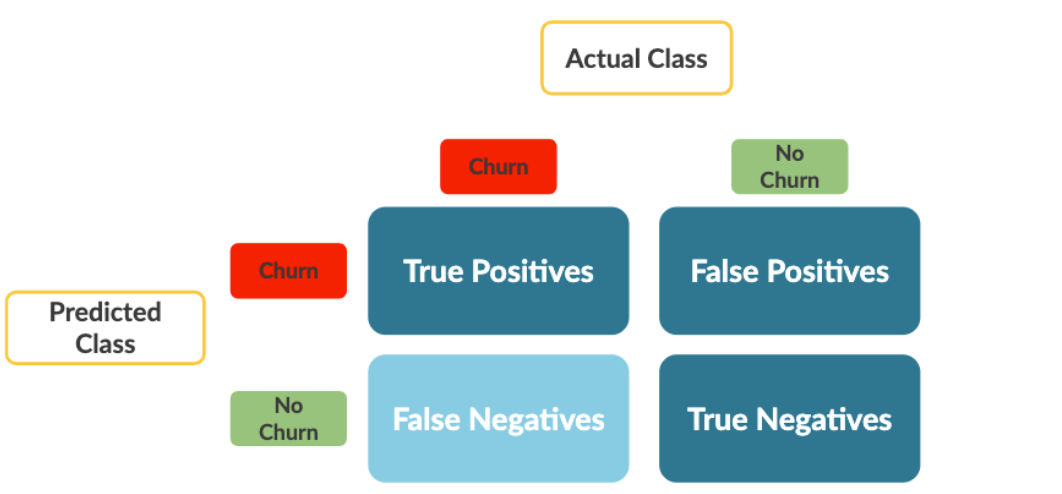

In [57]:
#<img src="./confusion matrix.png" width="90%" align="centre">
Image(filename = "confusion matrix.png", width=600, height=200)

[[ 44  61]
 [ 16 944]]


Text(0.5, 1.0, 'Confusion matrix, without normalization')

Text(0.5, 1.0, 'Normalized confusion matrix')

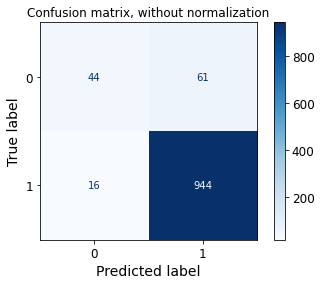

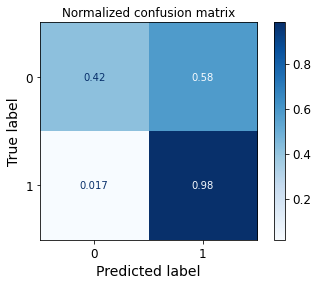

Recall Score: 98.33%
Precision Score: 93.93%


In [58]:
# Evaluation:
# Import confusion_matrix
#from sklearn.metrics import confusion_matrix
test_BC1_label_pred = clf.predict(test_BC1)
cm = confusion_matrix(test_BC1_label, test_BC1_label_pred)
print(confusion_matrix(test_BC1_label, test_BC1_label_pred))

# Visualise the confusion matrix
titles = [("Confusion matrix, without normalization", None), # print two matrics being normalised and not being normalised
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles:
    disp = plot_confusion_matrix(clf, test_BC1, test_BC1_label,
                                 display_labels=clf.classes_,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

print("Recall Score:","{:.2%}".format((recall_score(test_BC1_label,test_BC1_label_pred))))
print("Precision Score:","{:.2%}".format((precision_score(test_BC1_label,test_BC1_label_pred))))

<div class="alert alert-success">
<b>Conclusion</b>
    
<p> From DecisionTreeClassifier(max_leaf_nodes=8) model, I basically get a recall score at 98.33%, represents clients correctly identified as exiting clients divided by clients correctly identified as exiting clients plus clients incorrectly labeled as churning clients. Besides, a precision score at 93.93%, represents clients correctly identified as exiting clients divided by clients correctly identified as exiting clients plus clients incorrectly labeled as exiting ones.</p> 

</div>

<div class="alert alert-success">
<b> Reflection on DecisionTreeClassifier: </b>

<p>

**(4) Using BaggingClassifier to have training instances sampled multiple times for the same predictor:**
</p> 
</div>

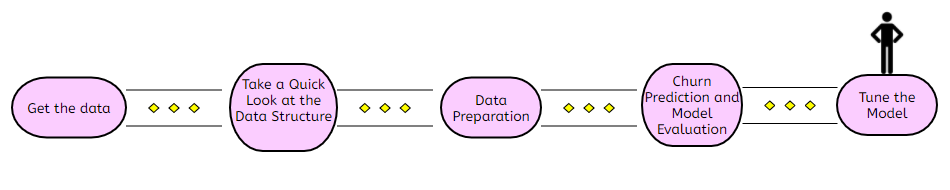

In [59]:
Image(filename = "tune.png", width=900, height=300)

In [60]:
#from sklearn.ensemble import BaggingClassifier
clf= DecisionTreeClassifier()
# I will use bagging method, drawing samples with replacement,to ensemble a meta-estimator
# randomized the data by fitting each estimator with a random subset of 80% of the training points
# I still randomly pick up a number of 100 base estimators in the ensemble
bag = BaggingClassifier(clf, n_estimators=100, max_samples=0.8, bootstrap=True, 
                        random_state=1,oob_score=True) # use out-of-bag samples to estimate the generalization error

bag.fit(train_BC1, train_BC1_label)
test_BC1_label_pred = bag.predict(test_BC1)

print("Recall Score:","{:.2%}".format((recall_score(test_BC1_label,test_BC1_label_pred))))
print("Precision Score:","{:.2%}".format((precision_score(test_BC1_label,test_BC1_label_pred))))
print("oob_score:","{:.2%}".format(bag.oob_score_))

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=1)

Recall Score: 98.75%
Precision Score: 97.43%
oob_score: 96.86%


<div class="alert alert-success">
Therefore, the resulting evaluation score, indicated by "oob_score", is 96.86%; fortunately, the recall score and precision score both suggest quite positive result.

In [61]:
# Check the shape
train_BC1.shape
test_BC1.shape

(4301, 22)

(1065, 22)

<div class="alert alert-success">
A BaggingClassifier could be put into a DecisionTreeClassifier as suggested above, where all features are considered for splitting one node. In contrast to this BaggingClassifier, a RandomForestClassifier, only randomly select a subset of features out of the total and pick the best split feature from the subset to split each node in a tree.

<div class="alert alert-success">
<p>

**(5) Using Gradient Boosting with early stopping to ensemble weak learners, correcting and improving  predecessor classifier:**
</p> 
</div>

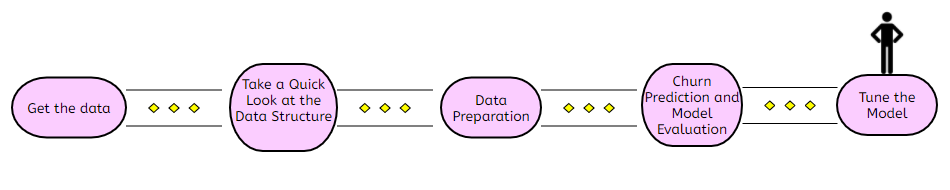

In [62]:
Image(filename = "tune.png", width=900, height=300)

In [63]:
#from sklearn.ensemble import GradientBoostingClassifier
# since the number of estimators is as high as 100, I would set the shrinkage factor as 1.0 to mitigate overfitting
gbclf = GradientBoostingClassifier(n_estimators=100, max_depth=7, learning_rate = 1.0)
gbclf.fit(train_BC1, train_BC1_label)

# retrieve the predicted labels produced by decision tree classifier
clf = DecisionTreeClassifier(max_leaf_nodes=8)
clf.fit(train_BC1, train_BC1_label)
test_BC1_label_pred = clf.predict(test_BC1)

# we need to measure the validation error at each stage of training to find the optimal number of trees
# use staged_predict() to implement early stopping
from sklearn.metrics import mean_squared_error
errors = [mean_squared_error(test_BC1_label, test_BC1_label_pred) # validate the predictions by computing mean-squared-error
          for test_BC1_label_pred in gbclf.staged_predict(test_BC1)]
bst_n_estimators = np.argmin(errors) + 1

gbclf_best = GradientBoostingClassifier(max_depth=7,n_estimators=bst_n_estimators, random_state=42)
gbclf_best.fit(train_BC1, train_BC1_label)
test_BC1_label_pred = gbclf_best.predict(test_BC1)

print("Recall Score:","{:.2%}".format((recall_score(test_BC1_label,test_BC1_label_pred))))
print("Precision Score:","{:.2%}".format((precision_score(test_BC1_label,test_BC1_label_pred))))

GradientBoostingClassifier(learning_rate=1.0, max_depth=7)

DecisionTreeClassifier(max_leaf_nodes=8)

GradientBoostingClassifier(max_depth=7, n_estimators=61, random_state=42)

Recall Score: 98.96%
Precision Score: 97.34%


In [64]:
min_error = np.min(errors)

<Figure size 792x288 with 0 Axes>

Text(61, 0.05746478873239436, 'Minimum')

(0.0, 100.0, 0.0, 0.1)

Text(0.5, 0, 'Number of trees')

Text(0.5, 1.0, 'Validation error')

Saving figure early_stopping_gbrt_plot


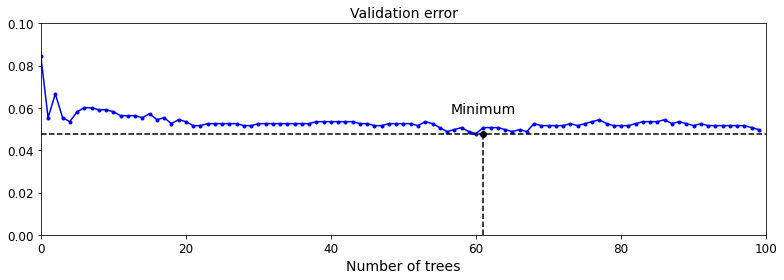

The best number of estimators is around 61.


In [65]:
plt.figure(figsize=(11, 4))

plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 100], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 100, 0, 0.1])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

save_fig("early_stopping_gbrt_plot")
plt.show()
print("The best number of estimators is around {}.".format(bst_n_estimators))

In [66]:
# Check the shape
train_BC1.shape
test_BC1.shape

(4301, 22)

(1065, 22)

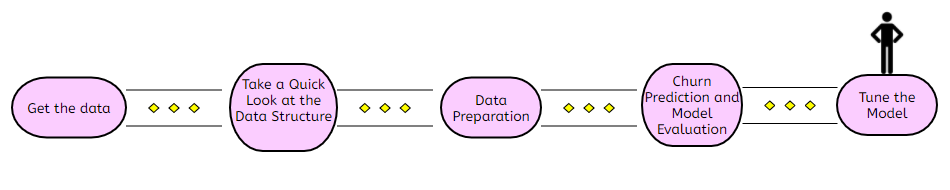

In [67]:
Image(filename = "tune.png", width=900, height=300)

Best: -0.073847 using {'learning_rate': 0.1, 'n_estimators': 300}
-0.282200 (0.002280) with: {'learning_rate': 0.001, 'n_estimators': 100}
-0.267086 (0.002130) with: {'learning_rate': 0.001, 'n_estimators': 200}
-0.255165 (0.002481) with: {'learning_rate': 0.001, 'n_estimators': 300}
-0.245441 (0.002847) with: {'learning_rate': 0.001, 'n_estimators': 400}
-0.234109 (0.005326) with: {'learning_rate': 0.001, 'n_estimators': 500}
-0.193883 (0.007074) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.156928 (0.006543) with: {'learning_rate': 0.01, 'n_estimators': 200}
-0.136798 (0.006884) with: {'learning_rate': 0.01, 'n_estimators': 300}
-0.124168 (0.007075) with: {'learning_rate': 0.01, 'n_estimators': 400}
-0.114659 (0.007744) with: {'learning_rate': 0.01, 'n_estimators': 500}
-0.088568 (0.008863) with: {'learning_rate': 0.1, 'n_estimators': 100}
-0.075910 (0.011616) with: {'learning_rate': 0.1, 'n_estimators': 200}
-0.073847 (0.012215) with: {'learning_rate': 0.1, 'n_estimators': 3

<Figure size 1008x504 with 0 Axes>

Text(0.5, 1.0, 'GradientBoosting n_estimators vs Log Loss')

Text(0.5, 0, 'n_estimators')

Text(0, 0.5, 'Log Loss')

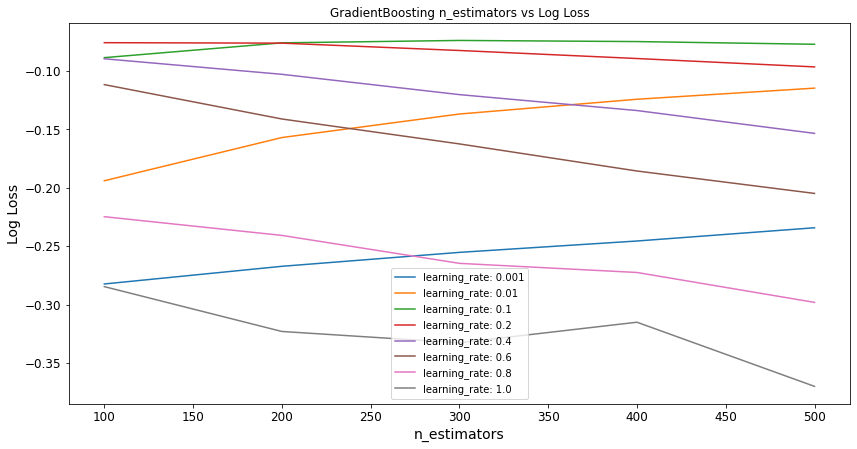

In [68]:
# Tune the model by changing hyperparameters
# Tuning Learning Rate and the number of trees in GradientBoosting
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0] #set a subset of learning rates
n_estimators = [100, 200, 300, 400, 500]
#learning_rate = [0.001, 0.01] # just a tryout 
#n_estimators = [100, 200]
# set a dictionary to include these parameters
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)

gbclf = GradientBoostingClassifier() # create this GBClassifier
grid_search = GridSearchCV(gbclf, param_grid, scoring="neg_log_loss", n_jobs=-1)
grid_result = grid_search.fit(train_BC1, train_BC1_label)

# summarise outcomes
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# show where is the best learning ratio and the best number of trees
pyplot.figure(figsize = (14,7))
scores = np.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label = "learning_rate: "+str(value))
pyplot.legend()
pyplot.title("GradientBoosting n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.show()

<div class="alert alert-success">
<b> Reflection on GridSearch Cross-validation: </b>
<p>
    
**(1) Best n_estimatos and relative loss:**
    
According to the plot, performance improves as the learning decreases from 1.0 to a range of 0.1 to 0.6; then performance will deteriorates once the learning rate is as small as 0.001 and 0.01. 
    
The performance will culminate if the number of estimators is around 250 to 350 and the learning ratio is about 0.1.
</p> 
    
<p>
 
**(2) Time-consuming:**
    
The disadvantage of GridSearch Cross-validation is that, as the hyperparameter grid gets larger, grid search becomes slower. In order to solve this problem, instead of trying out every single combination of values, I could also randomly jump around the grid and try different combinations. There's a small possibility we may miss the best combination, but we would save a lot of time, or be able to tune more hyperparameters in the same amount of time.
</p> 
    
<p>
 
**(3) Try RandomizedSearchCV in the next section:**
   
</p> 
</div>

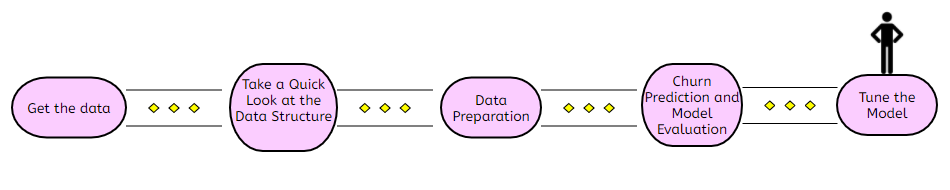

In [69]:
Image(filename = "tune.png", width=900, height=300)

In [70]:
# Tuning Learning Rate and the number of trees in GradientBoosting
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
gbclf = GradientBoostingClassifier() # create this GBClassifier
parameters = {'learning_rate': sp_randFloat(),
                  'subsample'    : sp_randFloat(),
                  'n_estimators' : sp_randInt(100, 500),
                  'max_depth'    : sp_randInt(4, 10) 
                 }
    
randm = RandomizedSearchCV(estimator=gbclf, param_distributions = parameters, 
                               cv = 2, n_iter = 10, n_jobs=-1)
randm.fit(train_BC1, train_BC1_label)

print("The best estimator across ALL searched params: ",
          randm.best_estimator_)

print("\n The best parameters across ALL searched params:\n ",
          randm.best_params_)

print("\n The best score across ALL searched params:\n",
          randm.best_score_)

# After Comparison...
# In comparison with the best parameters I obtained from GridSearchCV, they are pretty close to what I got from RandomSearchCV.

RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C1AD694CD0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C1B5E55850>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C1B5D18D90>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C1B9655730>})

The best estimator across ALL searched params:  GradientBoostingClassifier(learning_rate=0.6199788103281474, max_depth=4,
                           n_estimators=101, subsample=0.8958692859144117)

 The best parameters across ALL searched params:
  {'learning_rate': 0.6199788103281474, 'max_depth': 4, 'n_estimators': 101, 'subsample': 0.8958692859144117}

 The best score across ALL searched params:
 0.9646605689079173


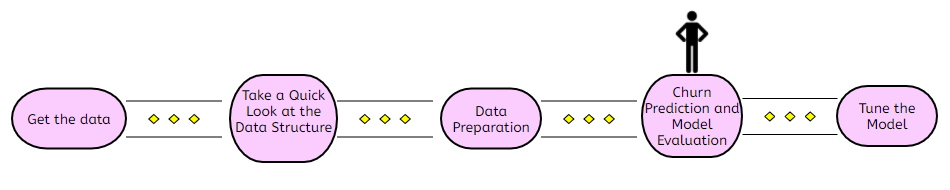

In [71]:
Image(filename = "churn prediction.png", width=900, height=300)

GradientBoostingClassifier(max_depth=7, n_estimators=300)

[[ 77  28]
 [ 10 950]]


Text(0.5, 1.0, 'Confusion matrix, without normalization')

Text(0.5, 1.0, 'Normalized confusion matrix')

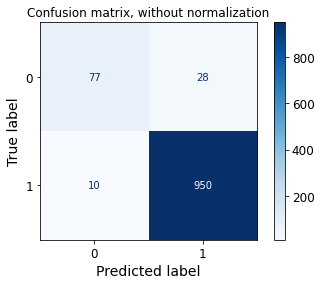

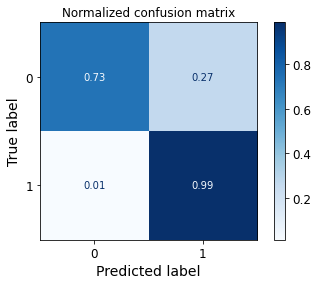

Recall Score: 98.96%
Precision Score: 97.14%


In [72]:
# Then I go back to the churn prediction stage to gain insights on the tuned decision tree classifier
gbclf = GradientBoostingClassifier(n_estimators=300, max_depth=7, learning_rate = 0.1)
gbclf.fit(train_BC1, train_BC1_label)
test_BC1_label_pred = gbclf.predict(test_BC1)

cm = confusion_matrix(test_BC1_label, test_BC1_label_pred)
print(confusion_matrix(test_BC1_label, test_BC1_label_pred))

# Visualise the confusion matrix
titles = [("Confusion matrix, without normalization", None), # print two matrics being normalised and not being normalised
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles:
    disp = plot_confusion_matrix(gbclf, test_BC1, test_BC1_label,
                                 display_labels=gbclf.classes_,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

print("Recall Score:","{:.2%}".format((recall_score(test_BC1_label,test_BC1_label_pred))))
print("Precision Score:","{:.2%}".format((precision_score(test_BC1_label,test_BC1_label_pred))))

GradientBoostingClassifier(learning_rate=0.208, max_depth=6, n_estimators=197)

[[ 79  26]
 [ 10 950]]


Text(0.5, 1.0, 'Confusion matrix, without normalization')

Text(0.5, 1.0, 'Normalized confusion matrix')

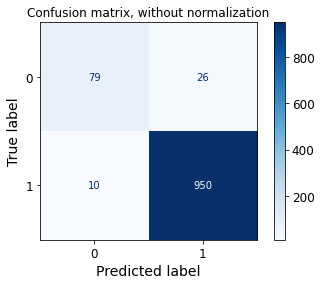

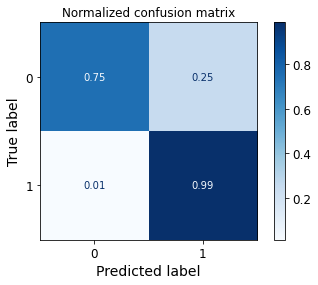

Recall Score: 98.96%
Precision Score: 97.34%


In [73]:
# Another approach is to put the parameters tuned by randomizedsearchCV
gbclf2 = GradientBoostingClassifier(n_estimators=197, max_depth=6, learning_rate = 0.208)
gbclf2.fit(train_BC1, train_BC1_label)
test_BC1_label_pred = gbclf2.predict(test_BC1)

cm = confusion_matrix(test_BC1_label, test_BC1_label_pred)
print(confusion_matrix(test_BC1_label, test_BC1_label_pred))

# Visualise the confusion matrix
titles = [("Confusion matrix, without normalization", None), # print two matrics being normalised and not being normalised
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles:
    disp = plot_confusion_matrix(gbclf2, test_BC1, test_BC1_label,
                                 display_labels=gbclf2.classes_,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

print("Recall Score:","{:.2%}".format((recall_score(test_BC1_label,test_BC1_label_pred))))
print("Precision Score:","{:.2%}".format((precision_score(test_BC1_label,test_BC1_label_pred))))

### 3. Try RandomForestClassifier

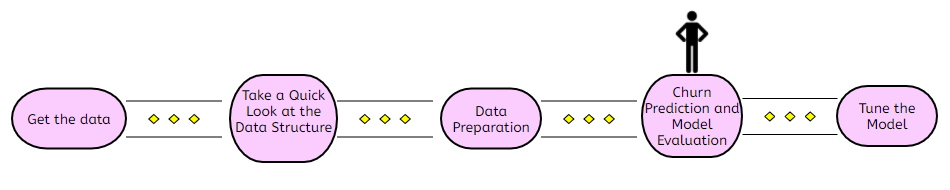

In [74]:
Image(filename = "churn prediction.png", width=900, height=300)

<div class="alert alert-success">
Random forest leverages the power of multiple decision trees; in other words, it relies on the feature importance given by a couple of decision tree. After running through all the tuning procedures related to decision tree classifier, I would like to have a try on this ensembled tree.

RandomForestClassifier()

[[ 70  35]
 [  5 955]]


Text(0.5, 1.0, 'Confusion matrix, without normalization')

Text(0.5, 1.0, 'Normalized confusion matrix')

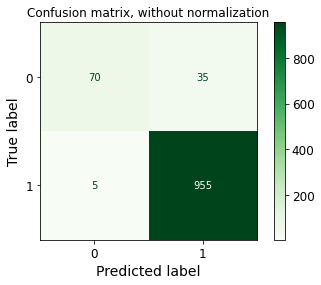

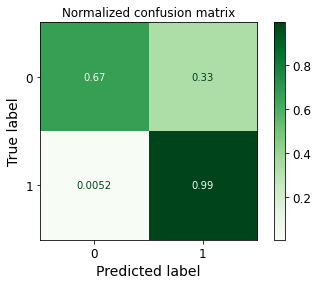

Recall Score 99.48%
Precision Score: 96.46%


In [75]:
# Import random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Fit the RandomForestClassifier to training dataset
rfc = RandomForestClassifier()
rfc.fit(train_BC1, train_BC1_label)

# Predict the labels of the test set
test_BC1_label_pred = rfc.predict(test_BC1)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix
test_BC1_label_pred = rfc.predict(test_BC1)
cm = confusion_matrix(test_BC1_label, test_BC1_label_pred)
print(confusion_matrix(test_BC1_label, test_BC1_label_pred))

# Visualise the confusion matrix
titles = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles:
    disp = plot_confusion_matrix(rfc, test_BC1, test_BC1_label,
                                 display_labels=rfc.classes_,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

# Check recall score and precision score
print("Recall Score","{:.2%}".format(recall_score(test_BC1_label, test_BC1_label_pred)))
print("Precision Score:","{:.2%}".format((precision_score(test_BC1_label,test_BC1_label_pred))))

[[ 70  35]
 [  5 955]]


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

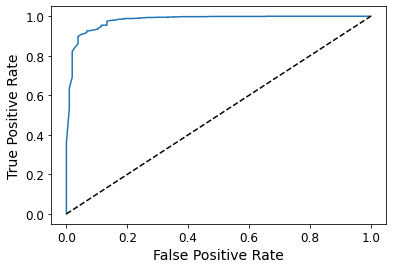

ROC_AUC_Score: 97.92%


In [76]:
# Check ROC curve to get some more insights
# Import confusion_matrix (for check the accuracy of the model we select)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_BC1_label, test_BC1_label_pred))

# Generate the probabilities
test_BC1_label_pred_prob = rfc.predict_proba(test_BC1)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(test_BC1_label, test_BC1_label_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print("ROC_AUC_Score:","{:.2%}".format(roc_auc_score(test_BC1_label, test_BC1_label_pred_prob)))

<div class="alert alert-success">
This curves summarize the tradeoff between the true positive rate and the positive predictive value. A high area under the curve represents both high recall and high precision. Precision-recall curves tend to be more informative when an dataset includes imbalanced classes.

In [77]:
# Check the shape
train_BC1.shape
test_BC1.shape

(4301, 22)

(1065, 22)

<div class="alert alert-success">
<b> Reflection on RandomForestClassifier: </b>

<p>

**(1) Comparison between  DecisionTreeClassifier and RandomForestClassifier:**
</p> 
</div>

DecisionTreeClassifier()

RandomForestClassifier()

[[<matplotlib.axis.YTick at 0x1c1ada5e700>,
 [Text(0, 0, 'Card_Category'),
  Text(0, 0, 'Gender'),
  Text(0, 0, 'Marital_Status'),
  Text(0, 0, 'Income_Category'),
  Text(0, 0, 'Education_Level'),
  Text(0, 0, 'Dependent_count'),
  Text(0, 0, 'Contacts_Count_12_mon'),
  Text(0, 0, 'Months_on_book'),
  Text(0, 0, 'Months_Inactive_12_mon'),
  Text(0, 0, 'CLIENTNUM'),
  Text(0, 0, 'Credit_Limit'),
  Text(0, 0, 'Avg_Open_To_Buy'),
  Text(0, 0, 'Customer_Age'),
  Text(0, 0, 'Avg_Utilization_Ratio'),
  Text(0, 0, 'Prop_unpaid'),
  Text(0, 0, 'Total_Amt_Chng_Q4_Q1'),
  Text(0, 0, 'Avg_tran_amount'),
  Text(0, 0, 'Total_Relationship_Count'),
  Text(0, 0, 'Total_Ct_Chng_Q4_Q1'),
  Text(0, 0, 'Total_Trans_Ct'),
  Text(0, 0, 'Total_Revolving_Bal'),
  Text(0, 0, 'Total_Trans_Amt')]]

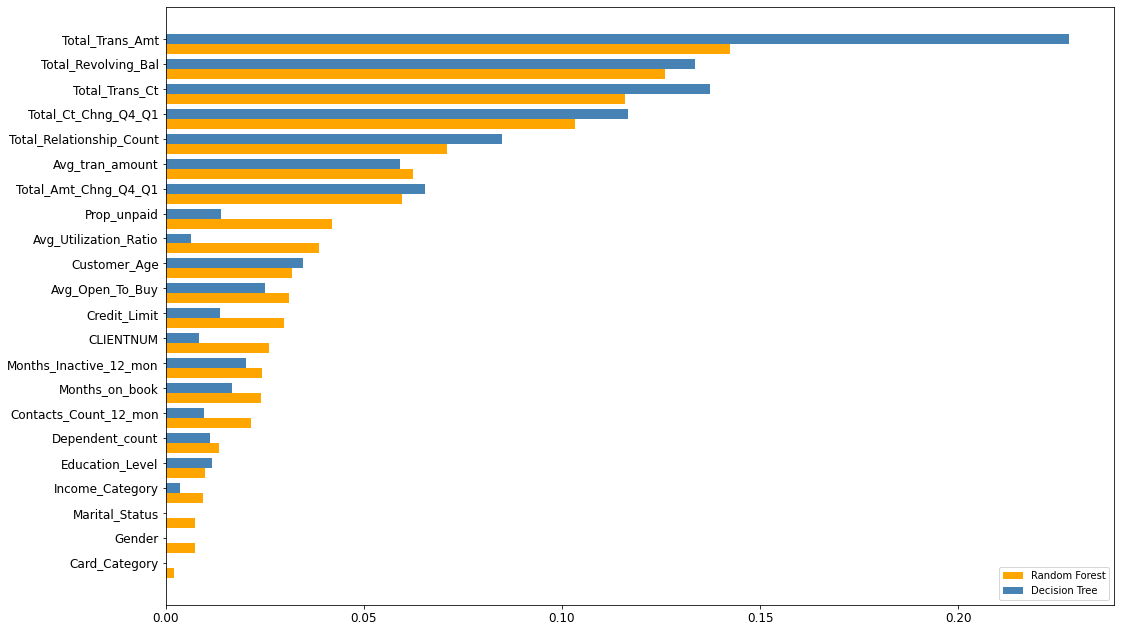

In [78]:
# Re-state the two classifiers
clf= DecisionTreeClassifier()
clf.fit(train_BC1, train_BC1_label)
rfc = RandomForestClassifier()
rfc.fit(train_BC1, train_BC1_label)

# Compare the presentation of important features obtained through these two different classifiers
feature_importance = pd.DataFrame({
    'rfc':rfc.feature_importances_,
    'clf':clf.feature_importances_
},index=train_BC1.columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))

fig, ax = plt.subplots(figsize=(17,11))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='orange',label='Random Forest')
clf_feature=ax.barh(index+0.4,feature_importance['clf'],0.4,color='#4682B4',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

<div class="alert alert-success">
<b> Top 10 important features derived from Random Forest and Decision Tree: </b>
    
Accordingly, under both decision tree classifier and random forest classifier, the top 3 most important features are customer's **total transaction amount**, **total revolving balance at the end of a credit term** and **total transaction counts**. However, total revolving balance is the second predictive feature under random forest classifier, but ranks as the third one under decision tree classifier.

&nbsp;
    
The intuition behind this is these three indicators show credit card line managers about the client's credibility, earning power, and insolvency. For those who keep high scores in these three indicators, they are more likely to be loyal existing credit card holders, vice versa.
    
&nbsp;
    
Here, the **feature importance** index derived in decision tree algorithms such as classification and regression trees (CART) are based on the reduction in the criterion used to select split points, like **Gini or entropy**.

### 4. Try Support Vector Machines

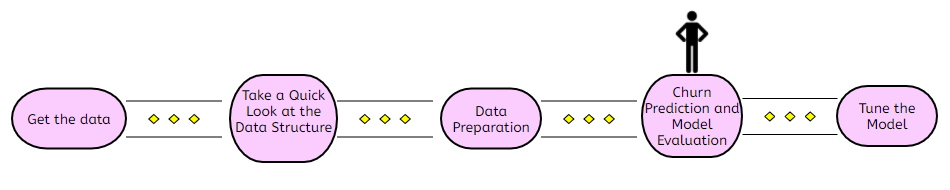

In [79]:
Image(filename = "churn prediction.png", width=900, height=300)

SVC(C=100, gamma=5)

[[  0 105]
 [  0 960]]


Text(0.5, 1.0, 'Confusion matrix, without normalization')

Text(0.5, 1.0, 'Normalized confusion matrix')

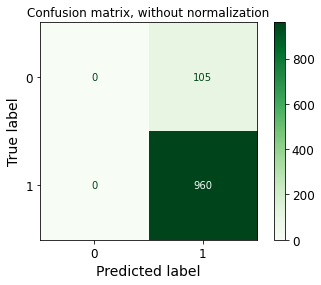

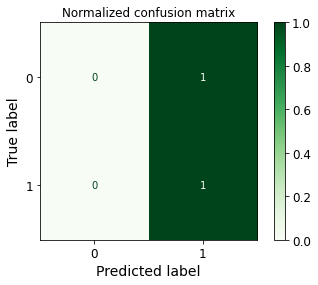

Recall Score 100.00%
Precision Score: 90.14%


In [80]:
# Import Support Vector Machine
from sklearn.svm import SVC

# Train a Gaussian RBF Kernel SVC classifier
rbf_kernel_svm_clf = SVC(kernel = "rbf", gamma=5, C=100)

# Use this classifier to fit the training dataset
rbf_kernel_svm_clf.fit(train_BC1, train_BC1_label)

# Predict the labels of the test set
test_BC1_label_pred = rbf_kernel_svm_clf.predict(test_BC1)

# confusion_matrix
test_BC1_label_pred = rbf_kernel_svm_clf.predict(test_BC1)
cm = confusion_matrix(test_BC1_label, test_BC1_label_pred)
print(confusion_matrix(test_BC1_label, test_BC1_label_pred))

# Visualise the confusion matrix
titles = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles:
    disp = plot_confusion_matrix(rbf_kernel_svm_clf, test_BC1, test_BC1_label,
                                 display_labels=rbf_kernel_svm_clf.classes_,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

# Check recall score and precision score
print("Recall Score","{:.2%}".format(recall_score(test_BC1_label, test_BC1_label_pred)))
print("Precision Score:","{:.2%}".format((precision_score(test_BC1_label,test_BC1_label_pred))))

SVC(C=100, class_weight={0: 0.4, 1: 0.6}, gamma=5)

[[  0 105]
 [  0 960]]


Text(0.5, 1.0, 'Confusion matrix, without normalization')

Text(0.5, 1.0, 'Normalized confusion matrix')

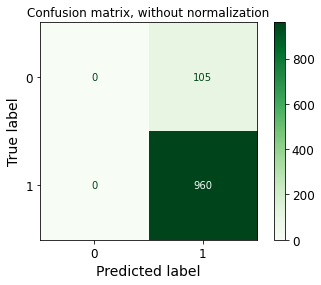

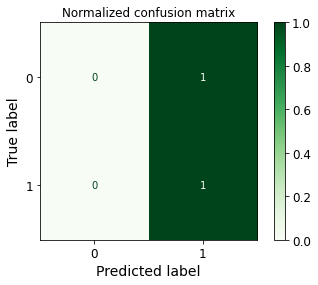

Recall Score 100.00%
Precision Score: 90.14%


In [81]:
# Secondly, I assume loosing a customers will cost bank more than maintaining customers who will gonna churn;
# therefore, I want to predict existing clients as precisely as possible (high TP, low FN)
# adjust the ratios between class weights of churn and existing customers
# we will give more importance to the EXSITING CUSTOMERS (referred to "1") 

# Train another Gaussian RBF Kernel SVC classifier
rbf_kernel_svm_clf1 = SVC(kernel = "rbf", gamma=5, C=100, class_weight={1:0.60, 0:0.40})#exsiting customers take 60% and the churn 40%

# Use this classifier to fit the training dataset
rbf_kernel_svm_clf1.fit(train_BC1, train_BC1_label)

# Predict the labels of the test set
test_BC1_label_pred = rbf_kernel_svm_clf1.predict(test_BC1)

# confusion_matrix
test_BC1_label_pred = rbf_kernel_svm_clf1.predict(test_BC1)
cm = confusion_matrix(test_BC1_label, test_BC1_label_pred)
print(confusion_matrix(test_BC1_label, test_BC1_label_pred))

# Visualise the confusion matrix
titles = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles:
    disp = plot_confusion_matrix(rbf_kernel_svm_clf1, test_BC1, test_BC1_label,
                                 display_labels=rbf_kernel_svm_clf1.classes_,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

# Check recall score and precision score
print("Recall Score","{:.2%}".format(recall_score(test_BC1_label, test_BC1_label_pred)))
print("Precision Score:","{:.2%}".format((precision_score(test_BC1_label,test_BC1_label_pred))))

<div class="alert alert-danger">
<b>Warning !</b>
    
<p>The model actually gives me zero precision in predicting "Attrition Flag" at 0,which is the group of churning clients. This result can also be observed from the following colour metrics with 100% recall rate. Reasonings behind this deserves further discussion.</p> 

</div>

In [82]:
# Use the top 2 significant attributes to print a classification boundary
train_part = train_BC1[["Total_Revolving_Bal","Total_Ct_Chng_Q4_Q1"]]
type(train_part)

train_label_part = train_BC1_label

# Train a Gaussian RBF Kernel SVC classifier
rbf_kernel_svm_clf = SVC(kernel = "rbf", gamma=5, C=0.001)

rbf_kernel_svm_clf.fit(train_part, train_label_part)

pandas.core.frame.DataFrame

SVC(C=0.001, gamma=5)

(4301,)

array([[2.517],
       [1.926],
       [0.648],
       ...,
       [1.323],
       [2.061],
       [2.517]], dtype=object)

array([[1.3],
       [0.794],
       [1.077],
       ...,
       [0.8959999999999999],
       [1.5],
       [0.833]], dtype=object)

array([[2.517, 1.3],
       [1.926, 0.794],
       [0.648, 1.077],
       ...,
       [1.323, 0.8959999999999999],
       [2.061, 1.5],
       [2.517, 0.833]], dtype=object)

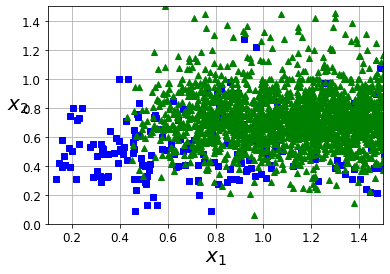

Saving figure boundary_svc_plot


<Figure size 432x288 with 0 Axes>

In [83]:
# Try to use the top 2 significant features to classify customers
feature1 = train_BC1[["Total_Revolving_Bal"]].values # numpy.ndarray
feature1 = feature1/1000 # the number is too large

feature2 = train_BC1[["Total_Ct_Chng_Q4_Q1"]].values # numpy.ndarray

feature_merged = np.hstack((feature1,feature2))

label = train_label_part.values # numpy.ndarray
label = label.reshape(-1)
label.shape

feature1
feature2
feature_merged

# Plot the dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
train_part, train_label_part = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(feature_merged, label, axes):
    plt.plot(feature1[:, 0][label==0], feature2[:, 0][label==0], "bs")
    plt.plot(feature1[:, 0][label==1], feature2[:, 0][label==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(feature_merged, label, [0.1, 1.5, 0, 1.5])
plt.show()
save_fig("boundary_svc_plot")
# Conclusion: 
# After this quick observation towards the predictive power of the top 2 features, the boundary is rather obscured and the result is poor.

Saving figure moons_polynomial_svc_plot


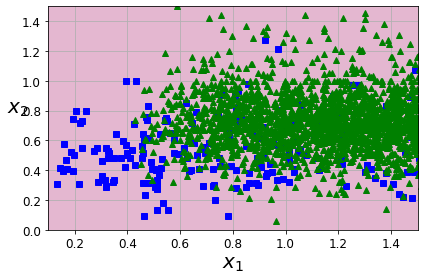

In [84]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(rbf_kernel_svm_clf, [0.1, 1.5, 0, 1.5])
plot_dataset(feature_merged, label, [0.1, 1.5, 0, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()
# Conclusion: 
# After this quick observation towards the predictive power of the top 2 features, the boundary is rather obscured and the result is poor.

In [85]:
# Check the shape
train_BC1.shape
test_BC1.shape

(4301, 22)

(1065, 22)

# Clustering Analysis

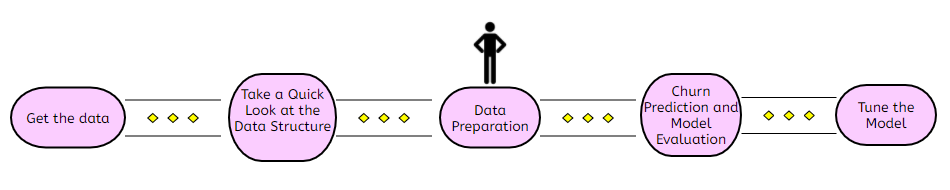

In [86]:
Image(filename = "preprocessing.png", width=900, height=300)

In [87]:
# Question: what are the features I am going to use in clustering analysis?
# what features would distinguish attrition-status
# step1: I am going to use all numerical features
status_data = train_BC.dropna(axis = 0)[num_features + ["Attrition_Flag"]]

status_data = status_data.astype(float) # change the datetype to float or there will be "no numerical types to aggregate"
status_groups = status_data.groupby("Attrition_Flag").mean().reset_index().dropna(axis=0) # show average data in this two categories
status_groups

Attrition_Flag  Dependent_count  Total_Relationship_Count  \
0             0.0         2.311856                  3.332474   
1             1.0         2.324048                  3.901354   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                2.788660               2.961340   8666.521649   
1                2.287248               2.352926   8705.045924   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0          1485.904639      7180.617010              0.694948   
1          1542.545617      7162.500307              0.776061   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0      3103.719072       44.719072             0.547356   
1      4694.907999       67.908255             0.740604   

   Avg_Utilization_Ratio  Avg_tran_amount  Prop_unpaid  
0               0.364851        63.855579     4.868147  
1               0.369425        62.970128     1.276730

In [90]:
# step2: standardise the data so mitigate the range deviation in data range
status_data_std = status_data.copy()
#from sklearn import preprocessing
for i in num_features:
    status_data[i] = preprocessing.scale(status_data[i])

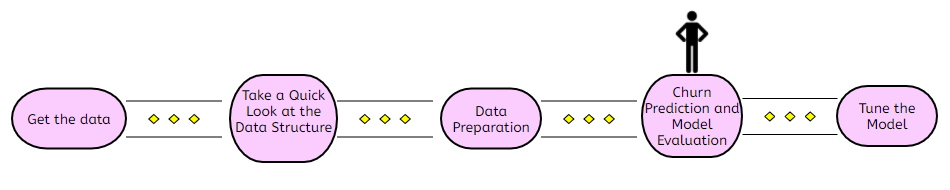

In [91]:
Image(filename = "churn prediction.png", width=900, height=300)

In [92]:
# step3: select clustering method and number of clusters
#from sklearn import cluster
km = cluster.KMeans(n_clusters = 2)
status_data_std["cluster"] = km.fit_predict(status_data_std[num_features])

### Principal Component Analysis

PCA(n_components=2, whiten=True)

<Figure size 792x288 with 0 Axes>

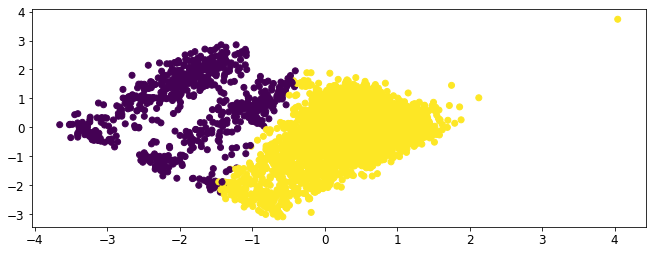

In [95]:
# step4: then use PCA(principal component analysis to support clustering process)
#from sklearn import decomposition
pca = decomposition.PCA(n_components=2, whiten=True)# set a target of 95% explained variation realised by N dimensions
pca.fit(status_data[num_features])
# I would like to try transforming the bank churner dataset from a high-dimensional space into a lower one, 
# since the dataset get 23 features with thousands of observations.

plt.figure(figsize=(11, 4))
status_data_std["x"] = pca.fit_transform(status_data_std[num_features])[:,0]
status_data_std["y"] = pca.fit_transform(status_data_std[num_features])[:,1]
plt.scatter(status_data_std["x"], status_data_std["y"], c=status_data_std["cluster"])
plt.show()

# The chart is well separate two clusters of clients against only two features extracted by PCA dimensionality

In [96]:
# step5: profile the clusters
cluster_profile = status_data.merge(status_data_std[["Attrition_Flag", "cluster"]]).groupby("cluster").mean()
cluster_profile
# The following table summarise that the average of each numerical feature against two clusters: existing and attrited customers

Dependent_count  Total_Relationship_Count  Months_Inactive_12_mon  \
cluster                                                                      
0               0.000774                  0.030317               -0.041763   
1               0.000761                  0.029800               -0.041051   

         Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
cluster                                                             
0                    -0.045640      0.000343             0.008397   
1                    -0.044862      0.000337             0.008254   

         Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
cluster                                                           
0              -0.000162              0.029831         0.035647   
1              -0.000159              0.029323         0.035040   

         Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
cluster                                                               
0              0.077974             0.065255               0.001426   
1              0.076645             0.064143               0.001402   

         Avg_tran_amount  Prop_unpaid  Attrition_Flag  
cluster                                                
0              -0.002622    -0.021933        0.991431  
1              -0.002577    -0.021559        0.990040

# Conclusion and Evaluation

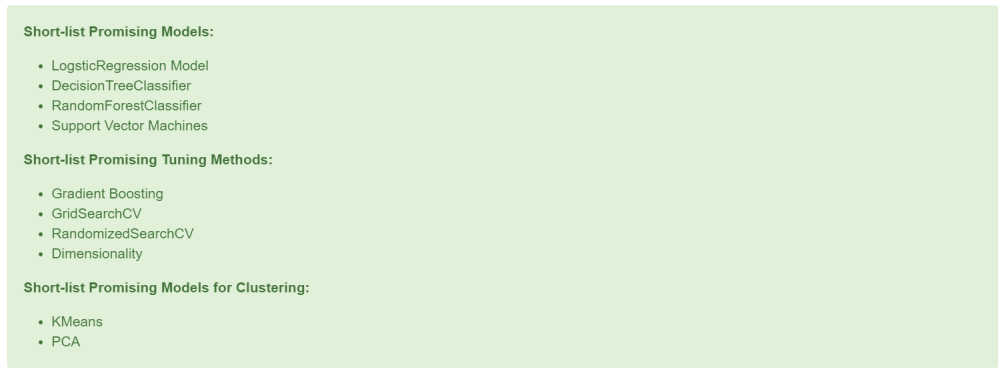

In [97]:
Image(filename = "modellist.png", width=900, height=300)

**Result Summary:**

By exploring decision tree, random forest tree, support vector machines, combined with several tuning models including gradient boosting (improving the single decision tree), GridSearchCV and RandomizedSearchCV, etc. The best result is achieved by:

-	**DecisionTreeClassifier with hyperparameters fine-tuned by RandomizedSearchCV (Recall: 98.96% | Precision: 97.34%)**

-	**RandomForestClassifier (Recall: 99.48% | Precision: 96.46%)**

Referring back to the curiosity towards factors leading to attrition, the top 3 reasons are:

-	**Total transaction amount**

-	**Total transaction counts**

-	**Total revolving balance**

This report is completed, but the exploration into why clients quit bank credit card line service never ends. Some areas needs further improved are:
-	**Data Collection**: enrich the feature dimensions with monetary features such as interests on debts
-	**Data Preparation**: 

    (1) build better pipeline or functions to automate cleaning procedure

    (2) use StratifiedShuffleSplit to split dataset (as follow), since the number of samples in two categories are not balanced
<pre><code>
          X = BankChurners[["Attrition_Flag"]]
          y = BankChurners.drop("Attrition_Flag", axis=1)
          from sklearn.model_selection import StratifiedShuffleSplit
          sss = StratifiedShuffleSplit(n_splits=10, test_size=0.5, 
                             random_state=42) 
          sss.get_n_splits(X, y)

          for train_index, test_index in sss.split(X, y):
                strat_train_set = housing.loc[train_index]
                strat_test_set = housing.loc[test_index]
    
          train_BC, test_BC = X[train_index], X[test_index] 
          train_BC_label, test_BC_label = y[train_index], y[test_index]
          </code></pre>
    
-	**Classification model**: although the classification model has achieved nice results, tuning process is not well designed for each parameter in one model; Besides, the tryout on support vector machines and on dimensionality should be extended.


-	**USE statsmodels.api to validate statistical significance**

In [98]:
import io
from nbformat import current
def nb_word_count(nb_path):
    with io.open(nb_path, 'r', encoding='utf-8') as f:
        nb = current.read(f, 'json')
        word_count = 0
        for cell in nb.worksheets[0].cells:
            if cell.cell_type == "markdown":
                word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
    return word_count

nb_path="Churn Analysis on Bank Credit Customer.ipynb"

nb_word_count(nb_path)

2369

#### For your review, the final jupyter notebook is available at: https://ucl.my.faculty.ai/project/dc2e40e2-2c18-4a46-b331-f4b491f7e7cf/workspace

# Not in Use

In [99]:
# Limited to the laptop's capacity and time limitation, the following code are hard to be executed
# they are used to look for the best number of clusters in PCA analysis

<pre><code>
from sklearn.cluster import KMeans
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(train_BC1_reduced)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

# plot the inertia as a function of  𝑘  and analyze the resulting curve
plt.figure(figsize=(12, 7))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()
</code></pre>

<pre><code>
from sklearn.metrics import silhouette_score
</code></pre>
<p>
# the shorther the sample distances within the cluster,the longer the distances between clusters,the higher the silhouette_score
</p>
<pre><code>
silhouette_score(train_BC1_reduced, kmeans.labels_)
silhouette_scores = [silhouette_score(train_BC1_reduced, model.labels_)
                     for model in kmeans_per_k[1:]]
</code></pre>

<p>
# plot the inertia as a function of 𝑘 and analyze the resulting curve
</p>
<pre><code>   
plt.figure(figsize=(12, 7))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_diagram")
plt.show()
</code></pre>